# Project: Credit Card Fraud Detection

#### Actions:
* Скачайте датасет с https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv
* Проведите небольшой EDA (гистограммы и описательные статистики - обязательно).
* Воспользуйтесь процентом аномалий, подсчитанным по переменной Class, как "экспертной оценкой" загрязненности нашего датасета.
* Попробуйте построить различные модели и алгоритмы, разобранные на занятии, используя полученную экспертную оценку для настройки параметров.
* Воспользуйтесь стандартными методами оценки качества бинарной классификации (особенно хорошо подойдёт classification report и confusion matrix), и, используя предсказания моделей и переменную Class, проверьте, действительно ли модели справляются со своей задачей и на сколько хорошо они это делают.
* При помощи tSNE и/или UMAP, постройте сжатое представление исходных данных и проверьте, действительно ли аномалии лежат достаточно далеко от основной массы точек.

## Description of data 
- The dataset contains transactions made by credit cards in September 2013 by European cardholders.
- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

- It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. 
- Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

- Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.


- The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
- More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

## Project structure (task decomposition)

### 1. [Exploratory Data Analysis (EDA)](#analysis)

### 2. [Standard methods](#standard)
### 3. [Clustering](#clustering)
### 4. [Unsupervised model-based](#unsupervised)
### 5. [Results of all unsupervised methods](#unsupervised)
### 6. [Supervised learning - Catboost classificator](#catboost)

<a id="analysis"></a>
## 1. Exploratory Data Analysis (EDA) 

<a id="analysis1"></a>
### 1.1. Loading and primary data processing 

In [1]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopy
from scipy import stats as st
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from plot_metric.functions import BinaryClassification
import itertools
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
import tensorflow as tensorflow
from keras import metrics
import pickle
import sweetviz as sw
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.utils import class_weight
from scipy import stats
from scipy.stats import norm
from scipy import stats
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,\
                            precision_recall_curve, roc_curve, classification_report, confusion_matrix,\
                            mean_squared_error, mean_absolute_error, fbeta_score, make_scorer, r2_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

C:\Users\Julia\anaconda3\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\Julia\anaconda3\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [2]:
# remove the limit on the number and width of columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
# Load the table from an external drive
#file_id = '1VRVzbBBqgTbeac6ARtXdYBITWsjmV_q7'
#download_link = f'https://drive.google.com/uc?id={file_id}'
#data = pd.read_csv(download_link)
#https://drive.google.com/file/d/1VRVzbBBqgTbeac6ARtXdYBITWsjmV_q7/view?usp=sharing

url="https://getfile.dokpub.com/yandex/get/https://disk.yandex.com/i/ZyQXqSHVa7dv5w"
data=pd.read_csv(url, sep=',')
data

Time         V1         V2        V3        V4        V5  \
0       0.0      -1.359807  -0.072781   2.536347  1.378155 -0.338321   
1       0.0       1.191857   0.266151   0.166480  0.448154  0.060018   
2       1.0      -1.358354  -1.340163   1.773209  0.379780 -0.503198   
3       1.0      -0.966272  -0.185226   1.792993 -0.863291 -0.010309   
4       2.0      -1.158233   0.877737   1.548718  0.403034 -0.407193   
...     ...            ...        ...        ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0 -0.732789  -0.055080   2.035030 -0.738589  0.868229   
284804  172788.0  1.919565  -0.301254  -3.249640 -0.557828  2.630515   
284805  172788.0 -0.240440   0.530483   0.702510  0.689799 -0.377961   
284806  172792.0 -0.533413  -0.189733   0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9       V10       V11       V12  \
0       0.462388  0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801   
1      -0.082361 -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235   
2       1.800499  0.791461  0.247676 -1.514654  0.207643  0.624501  0.066084   
3       1.247203  0.237609  0.377436 -1.387024 -0.054952 -0.226487  0.178228   
4       0.095921  0.592941 -0.270533  0.817739  0.753074 -0.822843  0.538196   
...          ...       ...       ...       ...       ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  4.356170 -1.593105  2.711941   
284803  1.058415  0.024330  0.294869  0.584800 -0.975926 -0.150189  0.915802   
284804  3.031260 -0.296827  0.708417  0.432454 -0.484782  0.411614  0.063119   
284805  0.623708 -0.686180  0.679145  0.392087 -0.399126 -1.933849 -0.962886   
284806 -0.649617  1.577006 -0.414650  0.486180 -0.915427 -1.040458 -0.031513   

             V13       V14       V15       V16       V17       V18       V19  \
0      -0.991390 -0.311169  1.468177 -0.470401  0.207971  0.025791  0.403993   
1       0.489095 -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783   
2       0.717293 -0.165946  2.345865 -2.890083  1.109969 -0.121359 -2.261857   
3       0.507757 -0.287924 -0.631418 -1.059647 -0.684093  1.965775 -1.232622   
4       1.345852 -1.119670  0.175121 -0.451449 -0.237033 -0.038195  0.803487   
...          ...       ...       ...       ...       ...       ...       ...   
284802 -0.689256  4.626942 -0.924459  1.107641  1.991691  0.510632 -0.682920   
284803  1.214756 -0.675143  1.164931 -0.711757 -0.025693 -1.221179 -1.545556   
284804 -0.183699 -0.510602  1.329284  0.140716  0.313502  0.395652 -0.577252   
284805 -1.042082  0.449624  1.962563 -0.608577  0.509928  1.113981  2.897849   
284806 -0.188093 -0.084316  0.041333 -0.302620 -0.660377  0.167430 -0.256117   

             V20       V21       V22       V23       V24       V25       V26  \
0       0.251412 -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1      -0.069083 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895   
2       0.524980  0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3      -0.208038 -0.108300  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4       0.408542 -0.009431  0.798278 -0.137458  0.141267 -0.206010  0.502292   
...          ...       ...       ...       ...       ...       ...       ...   
284802  1.475829  0.213454  0.111864  1.014480 -0.509348  1.436807  0.250034   
284803  0.059616  0.214205  0.924384  0.012463 -1.016226 -0.606624 -0.395255   
284804  0.001396  0.232045  0.578229 -0.037501  0.640134  0.265745 -0.087371   
284805  0.127434  0.265245  0.800049 -0.163298  0.123205 -0.569159  0.546668   
284806  0.382948  0.261057  0.643078  0.376777  0.008797 -0.473649 -0.818267   

             V27       V28  Amount  Class  
0       0.133558 -0.021053  149.62  0      
1      -0.008983  0.014724  2.69    0      
2      -0.055353 -0.059752  378.66  0      
3       0.062723  0.061458  123.50  0      
4       0.219422  0.215153  69.99   0      


In [5]:
# Check structure, data types, data completeness and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Check for complete duplicates
data.duplicated().sum()

1081

In [7]:
data.describe().round(3).T

count       mean        std      min        25%        50%  \
Time    284807.0  94813.860  47488.146  0.000    54201.500  84692.000   
V1      284807.0  0.000      1.959     -56.408  -0.920      0.018       
V2      284807.0  0.000      1.651     -72.716  -0.599      0.065       
V3      284807.0 -0.000      1.516     -48.326  -0.890      0.180       
V4      284807.0  0.000      1.416     -5.683   -0.849     -0.020       
V5      284807.0  0.000      1.380     -113.743 -0.692     -0.054       
V6      284807.0  0.000      1.332     -26.161  -0.768     -0.274       
V7      284807.0 -0.000      1.237     -43.557  -0.554      0.040       
V8      284807.0  0.000      1.194     -73.217  -0.209      0.022       
V9      284807.0 -0.000      1.099     -13.434  -0.643     -0.051       
V10     284807.0  0.000      1.089     -24.588  -0.535     -0.093       
V11     284807.0  0.000      1.021     -4.797   -0.762     -0.033       
V12     284807.0 -0.000      0.999     -18.684  -0.406      0.140       
V13     284807.0  0.000      0.995     -5.792   -0.649     -0.014       
V14     284807.0  0.000      0.959     -19.214  -0.426      0.051       
V15     284807.0  0.000      0.915     -4.499   -0.583      0.048       
V16     284807.0  0.000      0.876     -14.130  -0.468      0.066       
V17     284807.0 -0.000      0.849     -25.163  -0.484     -0.066       
V18     284807.0  0.000      0.838     -9.499   -0.499     -0.004       
V19     284807.0  0.000      0.814     -7.214   -0.456      0.004       
V20     284807.0  0.000      0.771     -54.498  -0.212     -0.062       
V21     284807.0  0.000      0.735     -34.830  -0.228     -0.029       
V22     284807.0 -0.000      0.726     -10.933  -0.542      0.007       
V23     284807.0  0.000      0.624     -44.808  -0.162     -0.011       
V24     284807.0  0.000      0.606     -2.837   -0.355      0.041       
V25     284807.0  0.000      0.521     -10.295  -0.317      0.017       
V26     284807.0  0.000      0.482     -2.605   -0.327     -0.052       
V27     284807.0 -0.000      0.404     -22.566  -0.071      0.001       
V28     284807.0 -0.000      0.330     -15.430  -0.053      0.011       
Amount  284807.0  88.350     250.120    0.000    5.600      22.000      
Class   284807.0  0.002      0.042      0.000    0.000      0.000       

               75%         max  
Time    139320.500  172792.000  
V1      1.316       2.455       
V2      0.804       22.058      
V3      1.027       9.383       
V4      0.743       16.875      
V5      0.612       34.802      
V6      0.399       73.302      
V7      0.570       120.589     
V8      0.327       20.007      
V9      0.597       15.595      
V10     0.454       23.745      
V11     0.740       12.019      
V12     0.618       7.848       
V13     0.663       7.127       
V14     0.493       10.527      
V15     0.649       8.878       
V16     0.523       17.315      
V17     0.400       9.254       
V18     0.501       5.041       
V19     0.459       5.592       
V20     0.133       39.421      
V21     0.186       27.203      
V22     0.529       10.503      
V23     0.148       22.528      
V24     0.440       4.585       
V25     0.351       7.520       
V26     0.241       3.517       
V27     0.091       31.612      
V28     0.078       33.848      
Amount  77.165      25691.160   
Class   0.000       1.000

In [8]:
data.Class.value_counts(normalize=True).round(3)

0    0.998
1    0.002
Name: Class, dtype: float64

* As mentioned in the data description (by the data provider), the dataset is very imbalanced. We can see, that the Class 1 (Fraud) has only 0,2% of all records
* Data types are correct and do not require conversion
* There are full duplicates, which should be dropped
* Scaling (Normalization) of data will be required for columns Time and Amount
* Analysis of distribution should be done per groups Class 0/1 separately
* For supervised learning (class prediction) we would need to do actions to balance this dataset (e.g. via Up/Downsampling techniques)
* For this project (unsupervised anomaly detection we shall try to use data as is)

In [9]:
# Convert all column names to lowercase
#data.columns = [x.lower() for x in data.columns]
#data = data.copy()
#data.rename(columns = {'':'',
#                        }, inplace = True) 
#data.head()

In [10]:
# check duplicated rows (full duplicates), and also will check how many class=1 among the duplicates
data[data.duplicated(keep=False)].head()

Time        V1        V2        V3        V4        V5        V6  \
32   26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33   26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
34   26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
35   26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
112  74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   

           V7        V8        V9       V10       V11       V12       V13  \
32   0.711206  0.176066 -0.286717 -0.484688  0.872490  0.851636 -0.571745   
33   0.711206  0.176066 -0.286717 -0.484688  0.872490  0.851636 -0.571745   
34   0.693039  0.179742 -0.285642 -0.482474  0.871800  0.853447 -0.571822   
35   0.693039  0.179742 -0.285642 -0.482474  0.871800  0.853447 -0.571822   
112 -0.036715  0.350995  0.118950 -0.243289  0.578063  0.674730 -0.534231   

          V14       V15       V16       V17       V18       V19       V20  \
32   0.100974 -1.519772 -0.284376 -0.310524 -0.404248 -0.823374 -0.290348   
33   0.100974 -1.519772 -0.284376 -0.310524 -0.404248 -0.823374 -0.290348   
34   0.102252 -1.519991 -0.285912 -0.309633 -0.403902 -0.823743 -0.283264   
35   0.102252 -1.519991 -0.285912 -0.309633 -0.403902 -0.823743 -0.283264   
112  0.446601  1.122885 -1.768001  1.241157 -2.449500 -1.747255 -0.335520   

          V21       V22       V23       V24       V25       V26       V27  \
32   0.046949  0.208105 -0.185548  0.001031  0.098816 -0.552904 -0.073288   
33   0.046949  0.208105 -0.185548  0.001031  0.098816 -0.552904 -0.073288   
34   0.049526  0.206537 -0.187108  0.000753  0.098117 -0.553471 -0.078306   
35   0.049526  0.206537 -0.187108  0.000753  0.098117 -0.553471 -0.078306   
112  0.102520  0.605089  0.023092 -0.626463  0.479120 -0.166937  0.081247   

          V28  Amount  Class  
32   0.023307  6.14    0      
33   0.023307  6.14    0      
34   0.025427  1.77    0      
35   0.025427  1.77    0      
112  0.001192  1.18    0

In [11]:
data[data.duplicated(keep=False)]['Class'].value_counts()

0    1822
1    32  
Name: Class, dtype: int64

* There is 32 records of Class=1 (Fraud) considered as full duplicates
* Unfortunately, they have to be dropped as well

In [12]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

<a id="analysis2"></a>
### 1.2. EDA: feature distribution, correlation analysis

In [13]:
# Additional (automatic) EDA
#profile = ProfileReport(data)
#profile

In [14]:
# Another automatic EDA
#repo=sw.analyze(data)
#repo.show_html('output.html', open_browser=True)

In [15]:
# See what the data looks like statistically (average, standard deviation, min and max values)
data.describe().round(1)

Time        V1        V2        V3        V4        V5        V6  \
count  283726.0  283726.0  283726.0  283726.0  283726.0  283726.0  283726.0   
mean   94811.1   0.0      -0.0       0.0      -0.0       0.0      -0.0        
std    47481.0   1.9       1.6       1.5       1.4       1.4       1.3        
min    0.0      -56.4     -72.7     -48.3     -5.7      -113.7    -26.2       
25%    54204.8  -0.9      -0.6      -0.9      -0.9      -0.7      -0.8        
50%    84692.5   0.0       0.1       0.2      -0.0      -0.1      -0.3        
75%    139298.0  1.3       0.8       1.0       0.7       0.6       0.4        
max    172792.0  2.5       22.1      9.4       16.9      34.8      73.3       

             V7        V8        V9       V10       V11       V12       V13  \
count  283726.0  283726.0  283726.0  283726.0  283726.0  283726.0  283726.0   
mean   0.0      -0.0      -0.0      -0.0       0.0      -0.0       0.0        
std    1.2       1.2       1.1       1.1       1.0       1.0       1.0        
min   -43.6     -73.2     -13.4     -24.6     -4.8      -18.7     -5.8        
25%   -0.6      -0.2      -0.6      -0.5      -0.8      -0.4      -0.6        
50%    0.0       0.0      -0.1      -0.1      -0.0       0.1      -0.0        
75%    0.6       0.3       0.6       0.5       0.7       0.6       0.7        
max    120.6     20.0      15.6      23.7      12.0      7.8       7.1        

            V14       V15       V16       V17       V18       V19       V20  \
count  283726.0  283726.0  283726.0  283726.0  283726.0  283726.0  283726.0   
mean   0.0       0.0       0.0       0.0       0.0      -0.0       0.0        
std    1.0       0.9       0.9       0.8       0.8       0.8       0.8        
min   -19.2     -4.5      -14.1     -25.2     -9.5      -7.2      -54.5       
25%   -0.4      -0.6      -0.5      -0.5      -0.5      -0.5      -0.2        
50%    0.1       0.0       0.1      -0.1      -0.0       0.0      -0.1        
75%    0.5       0.7       0.5       0.4       0.5       0.5       0.1        
max    10.5      8.9       17.3      9.3       5.0       5.6       39.4       

            V21       V22       V23       V24       V25       V26       V27  \
count  283726.0  283726.0  283726.0  283726.0  283726.0  283726.0  283726.0   
mean  -0.0      -0.0       0.0       0.0      -0.0       0.0       0.0        
std    0.7       0.7       0.6       0.6       0.5       0.5       0.4        
min   -34.8     -10.9     -44.8     -2.8      -10.3     -2.6      -22.6       
25%   -0.2      -0.5      -0.2      -0.4      -0.3      -0.3      -0.1        
50%   -0.0       0.0      -0.0       0.0       0.0      -0.1       0.0        
75%    0.2       0.5       0.1       0.4       0.4       0.2       0.1        
max    27.2      10.5      22.5      4.6       7.5       3.5       31.6       

            V28    Amount     Class  
count  283726.0  283726.0  283726.0  
mean   0.0       88.5      0.0       
std    0.3       250.4     0.0       
min   -15.4      0.0       0.0       
25%   -0.1       5.6       0.0       
50%    0.0       22.0      0.0       
75%    0.1       77.5      0.0       
max    33.8      25691.2   1.0

In [16]:
# See if the overall correlation matrix and matrix heatmap show anything
data.corr().round(2).tail(3)

Time    V1    V2    V3    V4    V5    V6    V7    V8    V9   V10  \
V28    -0.01 -0.00  0.00 -0.00  0.00 -0.00  0.00  0.00 -0.00  0.01  0.01   
Amount -0.01 -0.23 -0.53 -0.21  0.10 -0.39  0.22  0.40 -0.10 -0.04 -0.10   
Class  -0.01 -0.09  0.08 -0.18  0.13 -0.09 -0.04 -0.17  0.03 -0.09 -0.21   

         V11   V12   V13   V14  V15   V16   V17   V18   V19   V20   V21   V22  \
V28     0.00 -0.00 -0.00 -0.00  0.0 -0.00 -0.00 -0.00  0.00  0.00 -0.00  0.00   
Amount -0.00 -0.01  0.01  0.03 -0.0 -0.00  0.01  0.04 -0.06  0.34  0.11 -0.06   
Class   0.15 -0.25 -0.00 -0.29 -0.0 -0.19 -0.31 -0.11  0.03  0.02  0.03  0.00   

         V23   V24   V25  V26   V27   V28  Amount  Class  
V28    -0.00  0.00 -0.00 -0.0 -0.01  1.00  0.01    0.01   
Amount -0.11  0.01 -0.05 -0.0  0.03  0.01  1.00    0.01   
Class  -0.01 -0.01  0.00  0.0  0.02  0.01  0.01    1.00

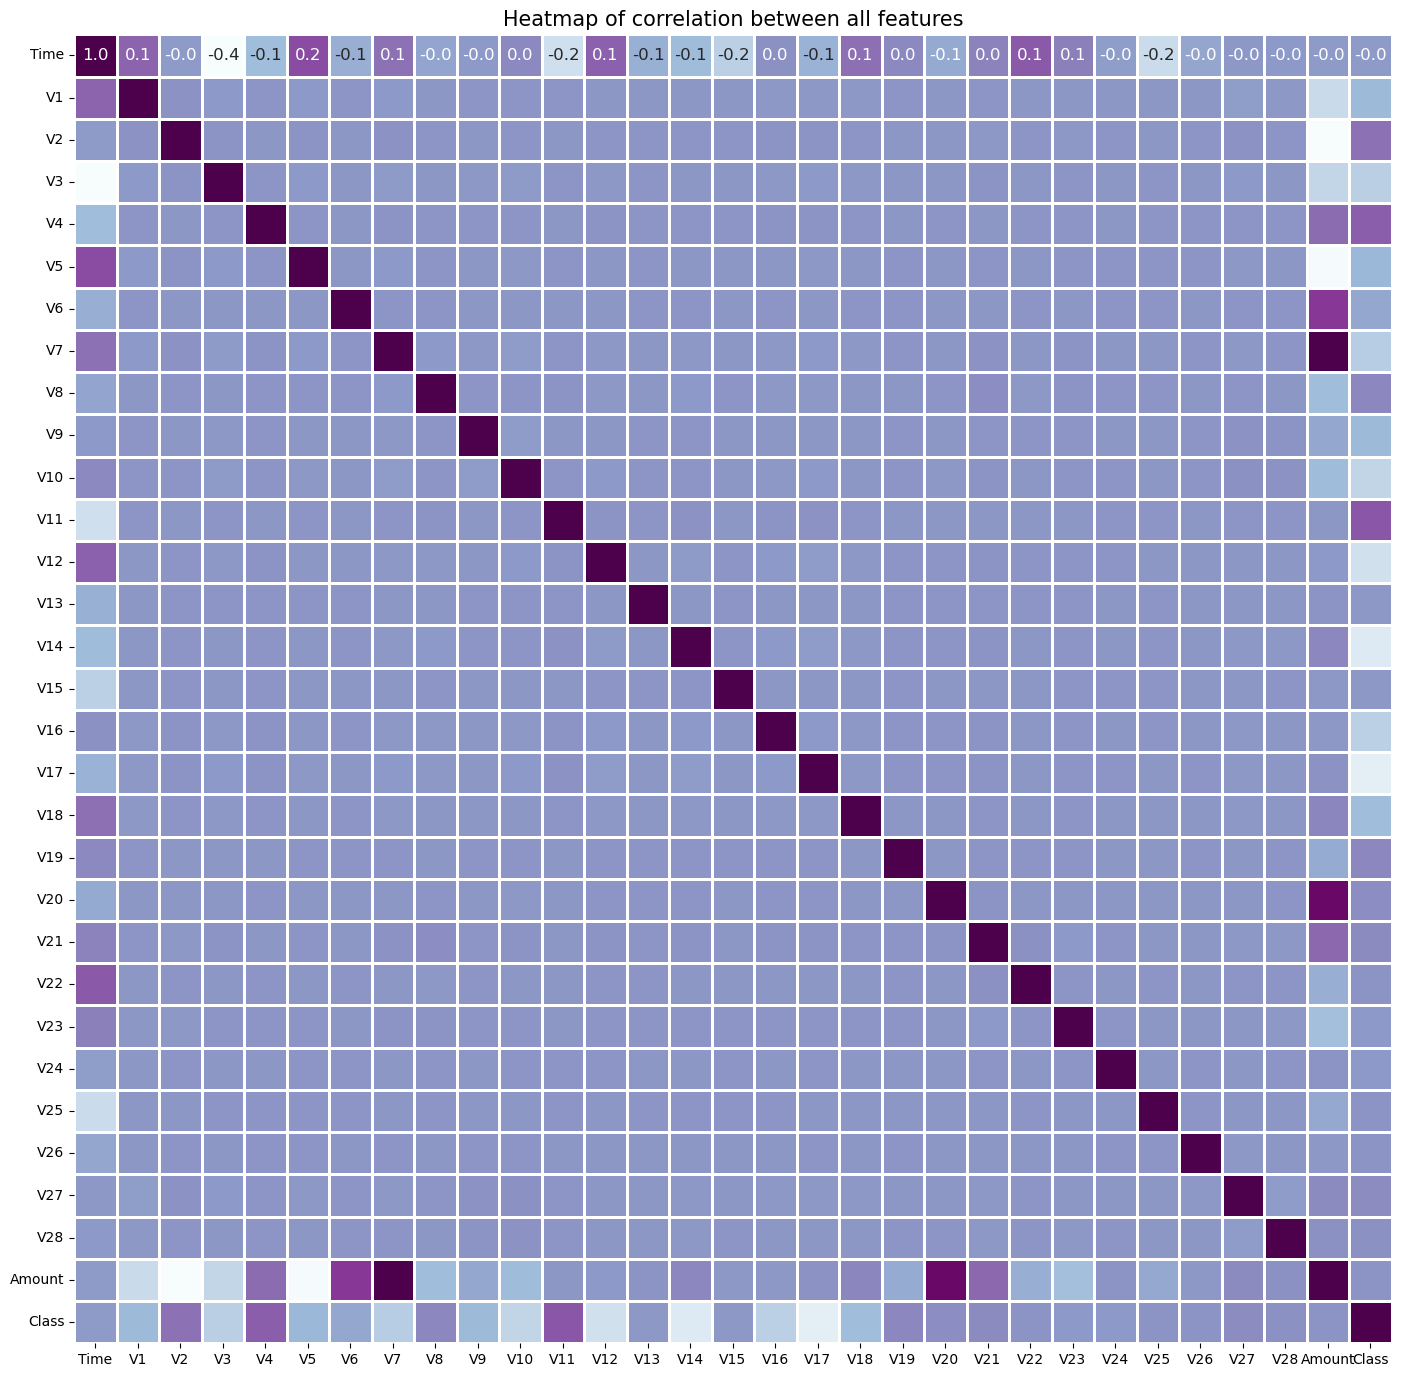

In [17]:
# Apply the heatmap method to display the correlation matrix in the form of
# a heat map of the relationship of all available features with each other
corr_m=data.corr()
plt.figure(figsize = (17,17))
sns.heatmap(data=corr_m, annot = True, linewidths=1, linecolor='white',cmap="BuPu",\
            fmt='.1f',cbar=False,  vmax=0.4, vmin=-0.4,  annot_kws={"size": 12})
plt.xticks(rotation=0) 
plt.yticks(rotation=0) 
plt.title('Heatmap of correlation between all features', fontsize=15)
plt.show()
#vmax=0.4, vmin=-0.3

* There is some visible correlation between amount and v1 (0,2),v2(-0,5), v3(0,2), v5 and v7 (0,4/-0,4), v20(0,3)
* Also there is some correlation between class and v3, v7,v10,v11, v16 (0,2/-0,2) and with v12, v14, v17 (0,3/-0,3)
* There is also some remarable corr for Times (second since the 1st transaction) - with the feature v3 (0,4)
* High correlation between columns is undesired and these has to be solved by excluding these columns 
* High correlation with Clas is OK and can be in the dataset

In [18]:
# Pairplot for some features based on class (1- Fraud)
#np.seterr(under='ignore')
#sns.pairplot(data=data)
#hue= 'class' #vars = ['', '', ''],
#vars = data.iloc[:, :-1], 
#plt.show()

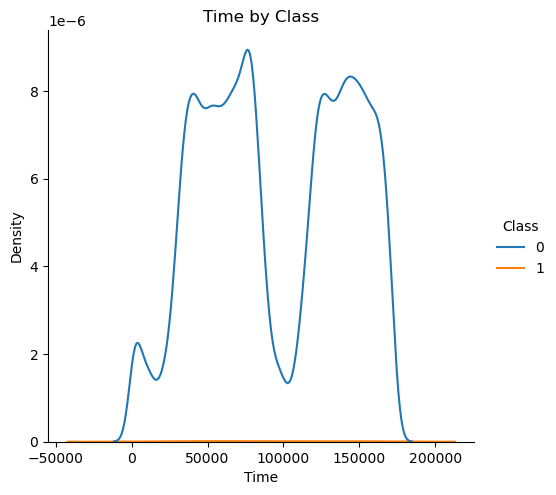

In [19]:
# Check the Time data by class
sns.displot(data=data, x="Time", kind="kde", hue="Class")

plt.rc('ytick')
plt.ylabel('Density')
plt.xlabel('Time')
plt.title('Time by Class')

plt.show()

In [20]:
data.head(1)

Time        V1        V2        V3        V4        V5        V6        V7  \
0  0.0  -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   

         V8        V9       V10     V11       V12      V13       V14  \
0  0.098698  0.363787  0.090794 -0.5516 -0.617801 -0.99139 -0.311169   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   

   Amount  Class  
0  149.62  0

* To reflect the general distribution of data, we will construct a set of diagrams (box-plots) for each feature:
     - for continuous quantities we will build boxplots
     - we do scaling of time and amount before that
     - due to heavy computational resources required, I will drop the first column Time to save the time and resoursec

In [21]:
# droping Time from the dataset
data = data.drop(columns =['Time'], axis=1)

In [152]:
# Columns to scale
columns_to_scale = ['Amount']
# Columns to keep unchanged
columns_to_keep = data.drop(columns =['Amount'], axis=1).columns

In [23]:
# Scale selected columns only if they have non-zero variance
scaler = RobustScaler()
scaled_columns = scaler.fit_transform(data[columns_to_scale])
# Create a DataFrame with scaled columns
df_scaled = pd.DataFrame(scaled_columns, columns=columns_to_scale)

In [24]:
df_scaled

Amount
0       1.774718
1      -0.268530
2       4.959811
3       1.411487
4       0.667362
...          ...
283721 -0.295230
283722  0.038798
283723  0.638020
283724 -0.166875
283725  2.711723

[283726 rows x 1 columns]

In [25]:
# Concatenate scaled columns with the remaining columns
#data=data.copy()
data_sc = pd.concat([df_scaled, data[columns_to_keep]], axis=1)
# Display the result
data_sc

Amount         V1         V2        V3        V4        V5  \
0       1.774718 -1.359807  -0.072781   2.536347  1.378155 -0.338321   
1      -0.268530  1.191857   0.266151   0.166480  0.448154  0.060018   
2       4.959811 -1.358354  -1.340163   1.773209  0.379780 -0.503198   
3       1.411487 -0.966272  -0.185226   1.792993 -0.863291 -0.010309   
4       0.667362 -1.158233   0.877737   1.548718  0.403034 -0.407193   
...          ...       ...        ...        ...       ...       ...   
284802 NaN       -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803 NaN       -0.732789  -0.055080   2.035030 -0.738589  0.868229   
284804 NaN        1.919565  -0.301254  -3.249640 -0.557828  2.630515   
284805 NaN       -0.240440   0.530483   0.702510  0.689799 -0.377961   
284806 NaN       -0.533413  -0.189733   0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9       V10       V11       V12  \
0       0.462388  0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801   
1      -0.082361 -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235   
2       1.800499  0.791461  0.247676 -1.514654  0.207643  0.624501  0.066084   
3       1.247203  0.237609  0.377436 -1.387024 -0.054952 -0.226487  0.178228   
4       0.095921  0.592941 -0.270533  0.817739  0.753074 -0.822843  0.538196   
...          ...       ...       ...       ...       ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  4.356170 -1.593105  2.711941   
284803  1.058415  0.024330  0.294869  0.584800 -0.975926 -0.150189  0.915802   
284804  3.031260 -0.296827  0.708417  0.432454 -0.484782  0.411614  0.063119   
284805  0.623708 -0.686180  0.679145  0.392087 -0.399126 -1.933849 -0.962886   
284806 -0.649617  1.577006 -0.414650  0.486180 -0.915427 -1.040458 -0.031513   

             V13       V14       V15       V16       V17       V18       V19  \
0      -0.991390 -0.311169  1.468177 -0.470401  0.207971  0.025791  0.403993   
1       0.489095 -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783   
2       0.717293 -0.165946  2.345865 -2.890083  1.109969 -0.121359 -2.261857   
3       0.507757 -0.287924 -0.631418 -1.059647 -0.684093  1.965775 -1.232622   
4       1.345852 -1.119670  0.175121 -0.451449 -0.237033 -0.038195  0.803487   
...          ...       ...       ...       ...       ...       ...       ...   
284802 -0.689256  4.626942 -0.924459  1.107641  1.991691  0.510632 -0.682920   
284803  1.214756 -0.675143  1.164931 -0.711757 -0.025693 -1.221179 -1.545556   
284804 -0.183699 -0.510602  1.329284  0.140716  0.313502  0.395652 -0.577252   
284805 -1.042082  0.449624  1.962563 -0.608577  0.509928  1.113981  2.897849   
284806 -0.188093 -0.084316  0.041333 -0.302620 -0.660377  0.167430 -0.256117   

             V20       V21       V22       V23       V24       V25       V26  \
0       0.251412 -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1      -0.069083 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895   
2       0.524980  0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3      -0.208038 -0.108300  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4       0.408542 -0.009431  0.798278 -0.137458  0.141267 -0.206010  0.502292   
...          ...       ...       ...       ...       ...       ...       ...   
284802  1.475829  0.213454  0.111864  1.014480 -0.509348  1.436807  0.250034   
284803  0.059616  0.214205  0.924384  0.012463 -1.016226 -0.606624 -0.395255   
284804  0.001396  0.232045  0.578229 -0.037501  0.640134  0.265745 -0.087371   
284805  0.127434  0.265245  0.800049 -0.163298  0.123205 -0.569159  0.546668   
284806  0.382948  0.261057  0.643078  0.376777  0.008797 -0.473649 -0.818267   

             V27       V28  Class  
0       0.133558 -0.021053  0.0    
1      -0.008983  0.014724  0.0    
2      -0.055353 -0.059752  0.0    
3       0.062723  0.061458  0.0    
4       0.219422  0.215153  0.0    
...          ...       ...  ...    
284802  0.

In [26]:
rows_with_nan = data_sc[data_sc.isnull().any(axis=1)]
rows_with_nan.tail()

Amount         V1         V2        V3        V4        V5        V6  \
284802 NaN     -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803 NaN     -0.732789  -0.055080   2.035030 -0.738589  0.868229  1.058415   
284804 NaN      1.919565  -0.301254  -3.249640 -0.557828  2.630515  3.031260   
284805 NaN     -0.240440   0.530483   0.702510  0.689799 -0.377961  0.623708   
284806 NaN     -0.533413  -0.189733   0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10       V11       V12       V13  \
284802 -4.918215  7.305334  1.914428  4.356170 -1.593105  2.711941 -0.689256   
284803  0.024330  0.294869  0.584800 -0.975926 -0.150189  0.915802  1.214756   
284804 -0.296827  0.708417  0.432454 -0.484782  0.411614  0.063119 -0.183699   
284805 -0.686180  0.679145  0.392087 -0.399126 -1.933849 -0.962886 -1.042082   
284806  1.577006 -0.414650  0.486180 -0.915427 -1.040458 -0.031513 -0.188093   

             V14       V15       V16       V17       V18       V19       V20  \
284802  4.626942 -0.924459  1.107641  1.991691  0.510632 -0.682920  1.475829   
284803 -0.675143  1.164931 -0.711757 -0.025693 -1.221179 -1.545556  0.059616   
284804 -0.510602  1.329284  0.140716  0.313502  0.395652 -0.577252  0.001396   
284805  0.449624  1.962563 -0.608577  0.509928  1.113981  2.897849  0.127434   
284806 -0.084316  0.041333 -0.302620 -0.660377  0.167430 -0.256117  0.382948   

             V21       V22       V23       V24       V25       V26       V27  \
284802  0.213454  0.111864  1.014480 -0.509348  1.436807  0.250034  0.943651   
284803  0.214205  0.924384  0.012463 -1.016226 -0.606624 -0.395255  0.068472   
284804  0.232045  0.578229 -0.037501  0.640134  0.265745 -0.087371  0.004455   
284805  0.265245  0.800049 -0.163298  0.123205 -0.569159  0.546668  0.108821   
284806  0.261057  0.643078  0.376777  0.008797 -0.473649 -0.818267 -0.002415   

             V28  Class  
284802  0.823731  0.0    
284803 -0.053527  0.0    
284804 -0.026561  0.0    
284805  0.104533  0.0    
284806  0.013649  0.0

In [27]:
data_sc.dropna(inplace=True)
rows_with_nan1 = data_sc[data_sc.isnull().any(axis=1)]
rows_with_nan1.tail()

Empty DataFrame
Columns: [Amount, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Class]
Index: []

In [29]:
data_sc['Class'].unique()

array([0., 1.])

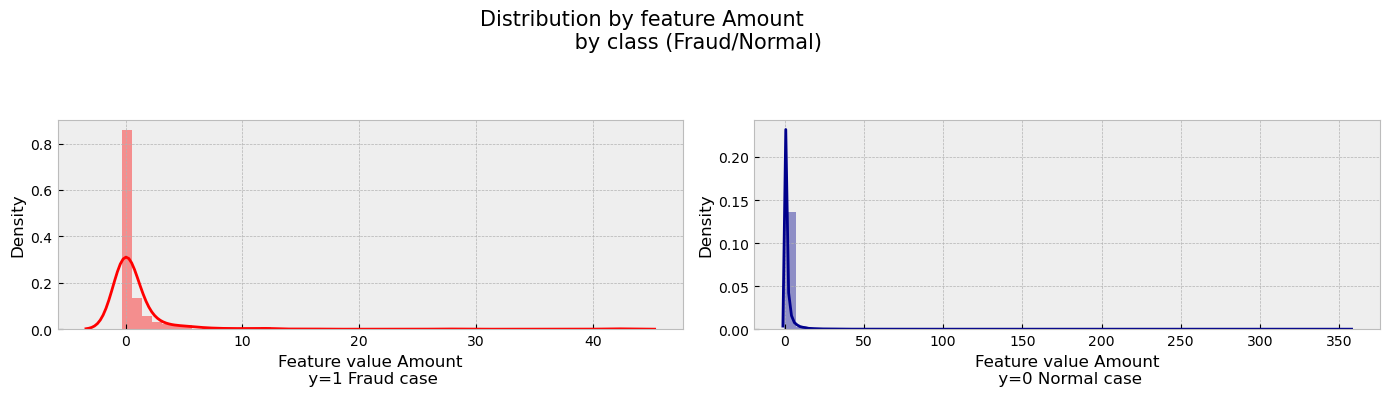

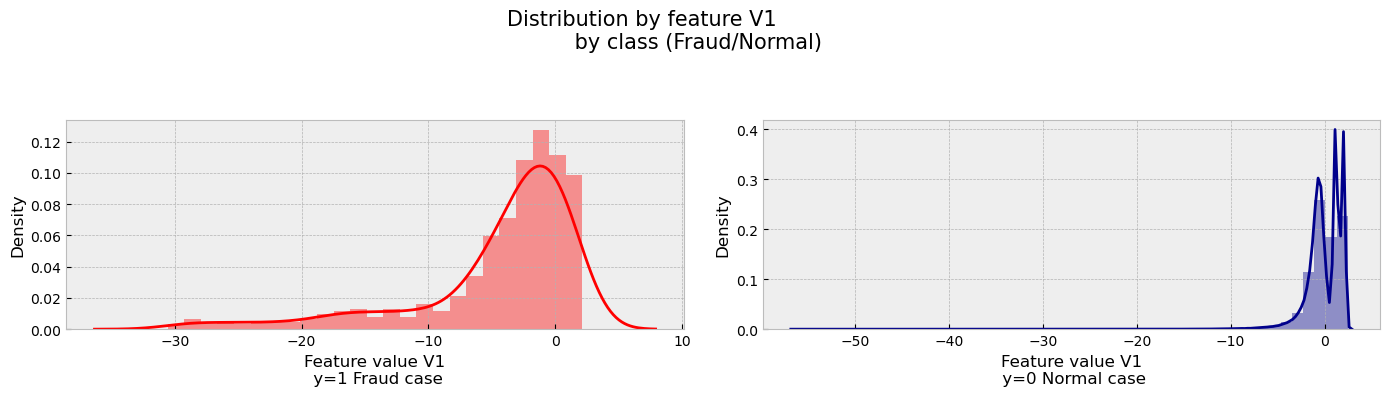

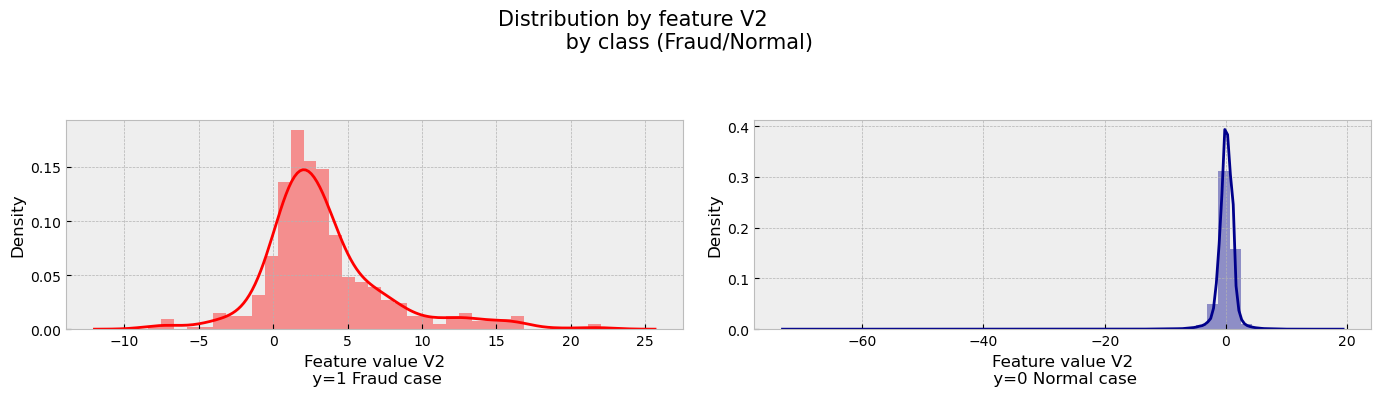

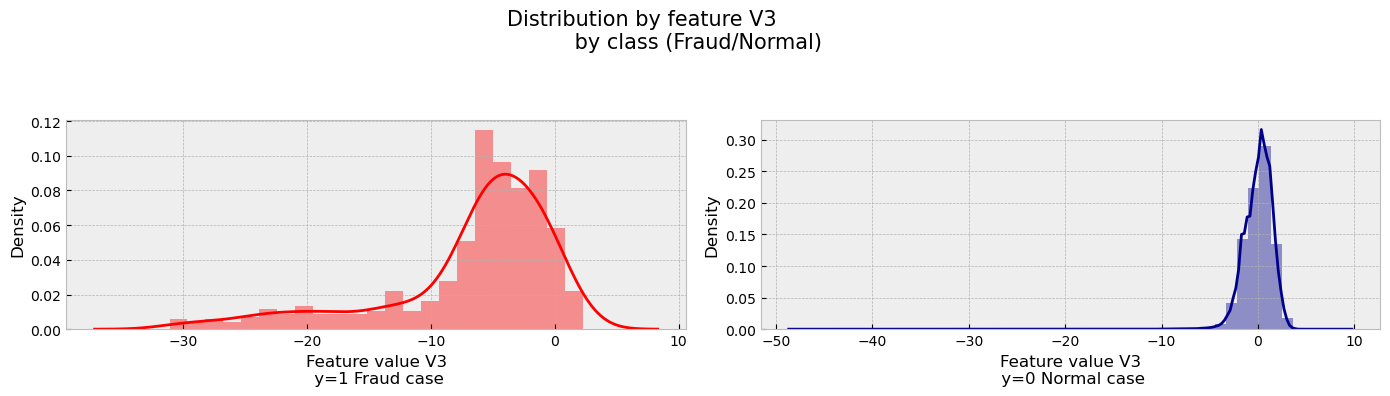

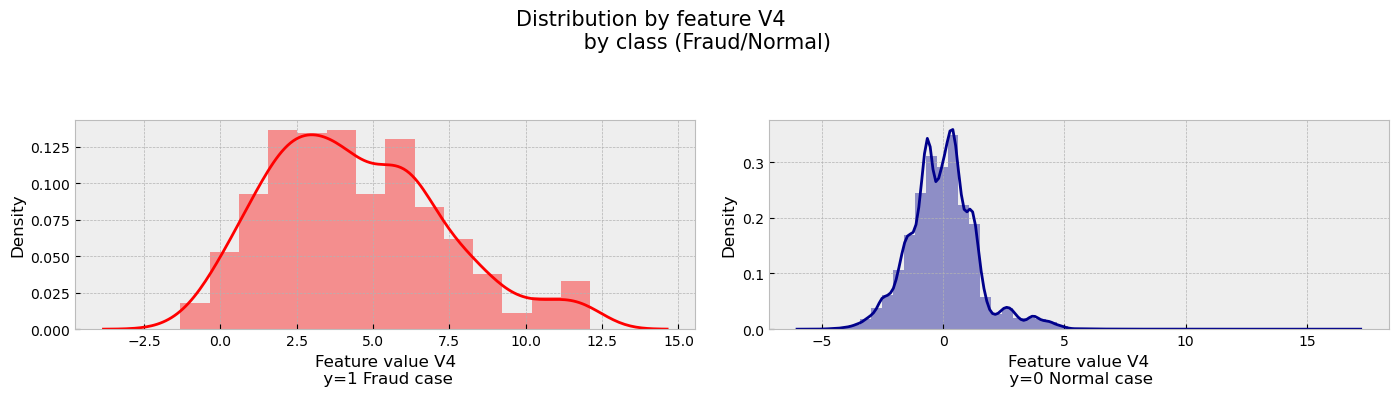

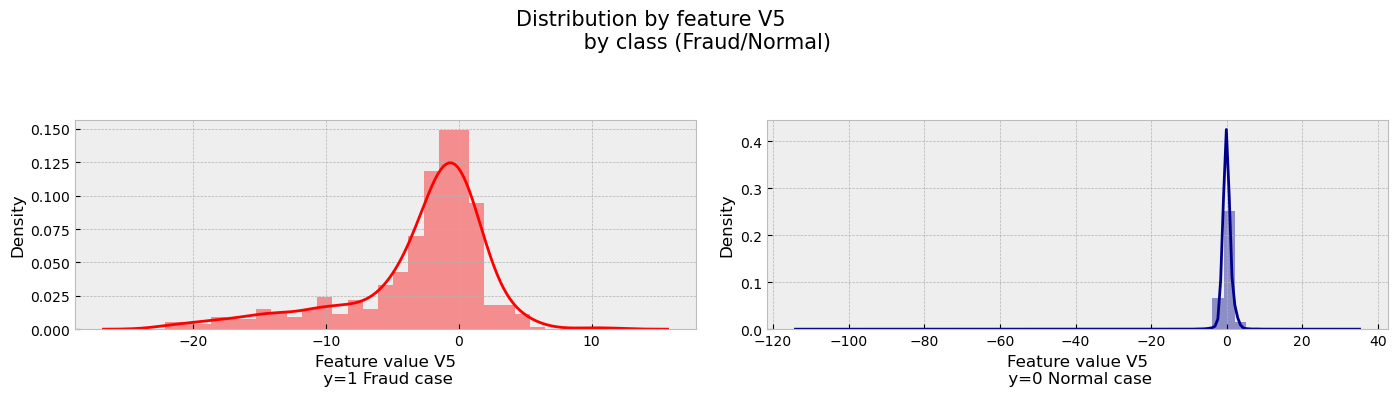

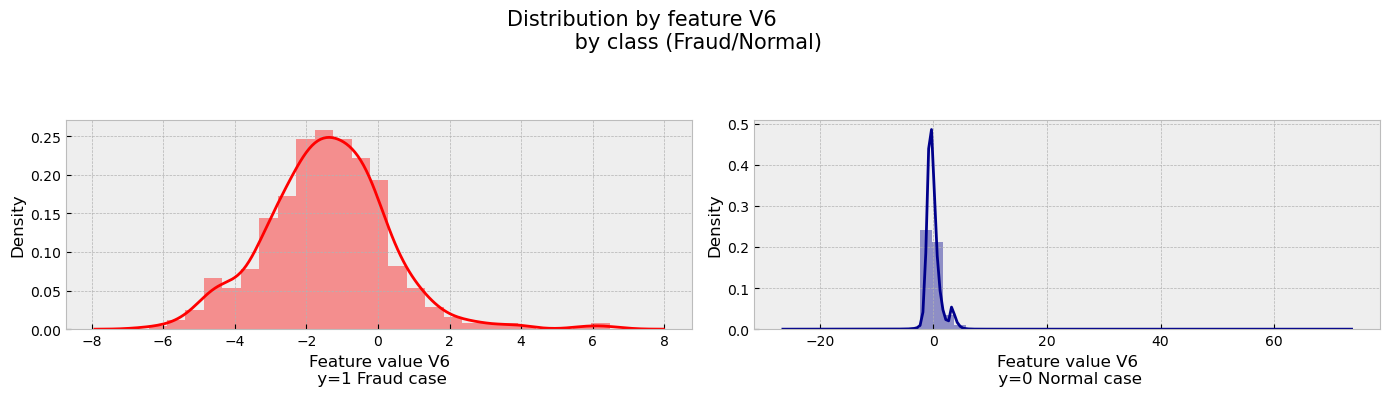

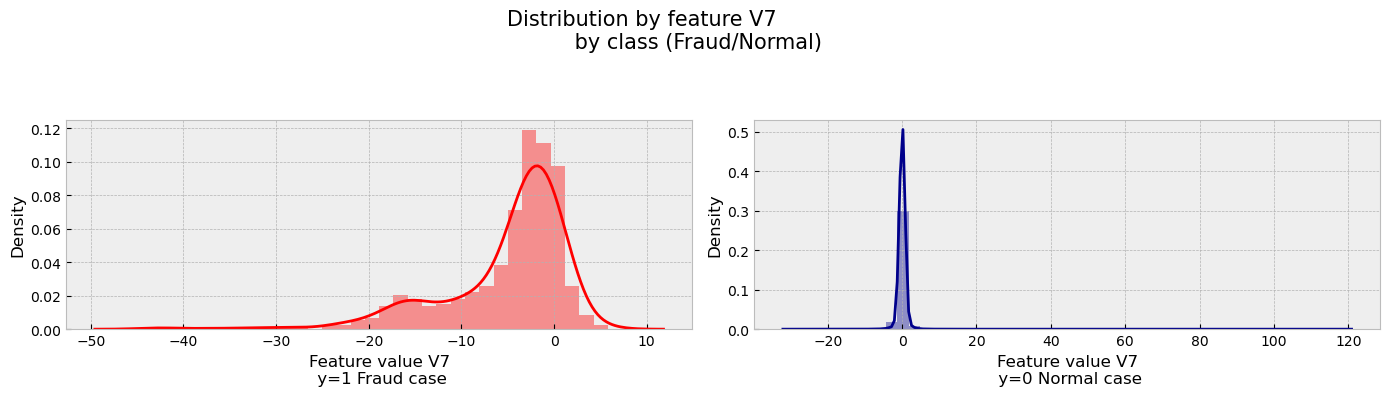

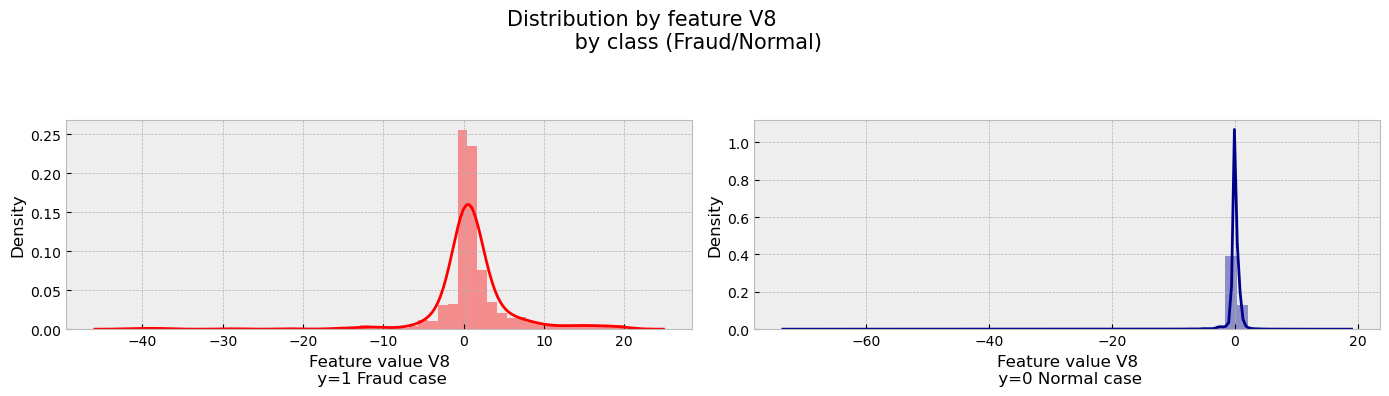

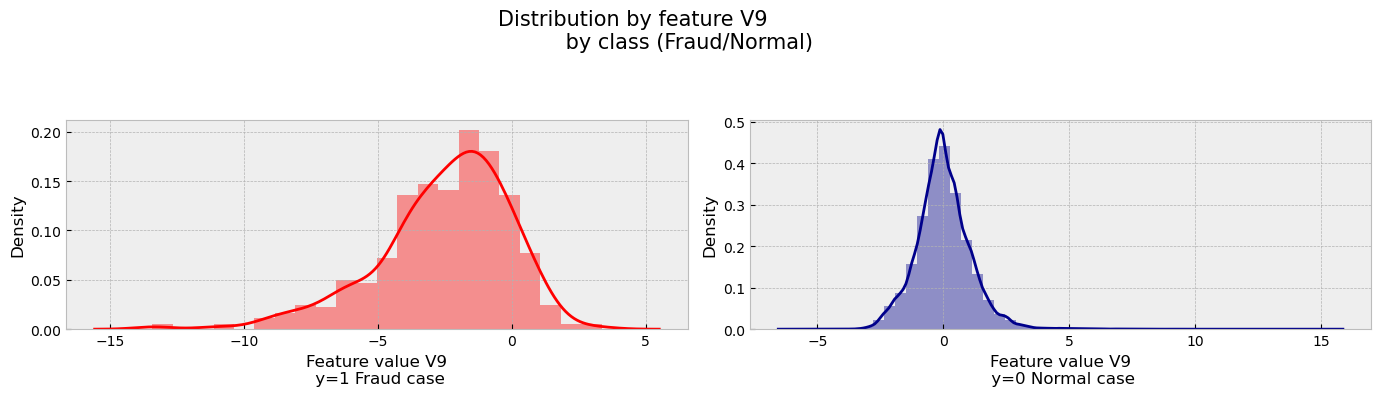

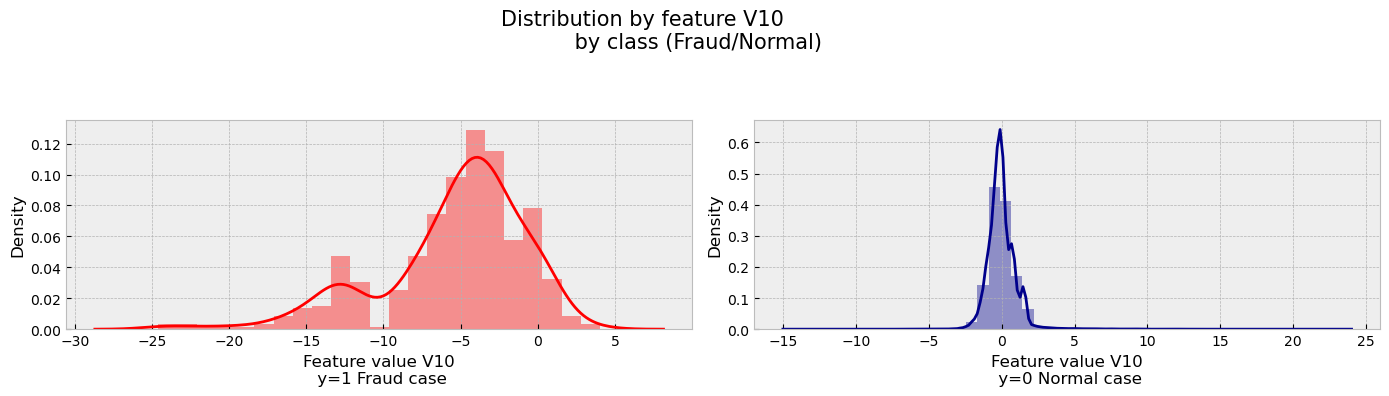

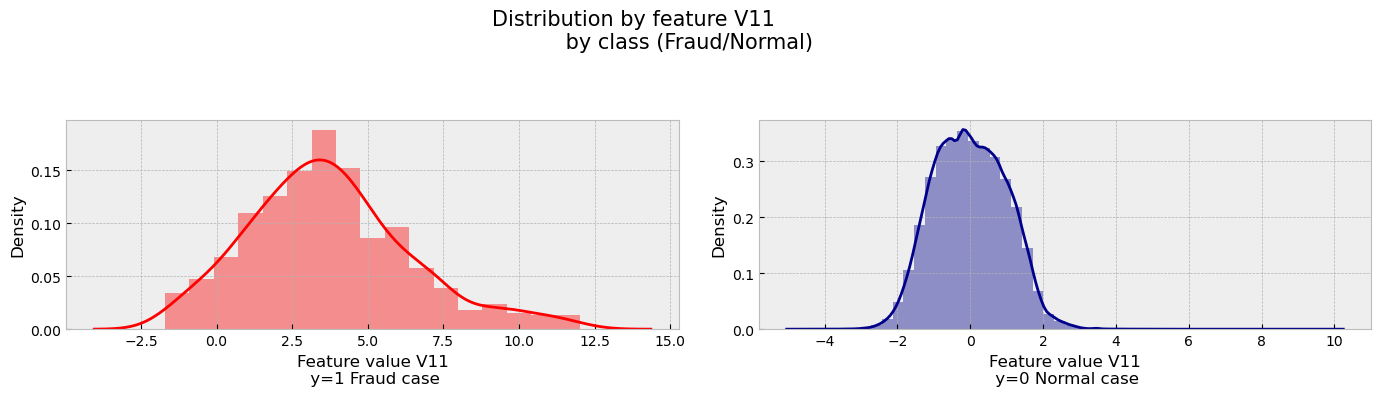

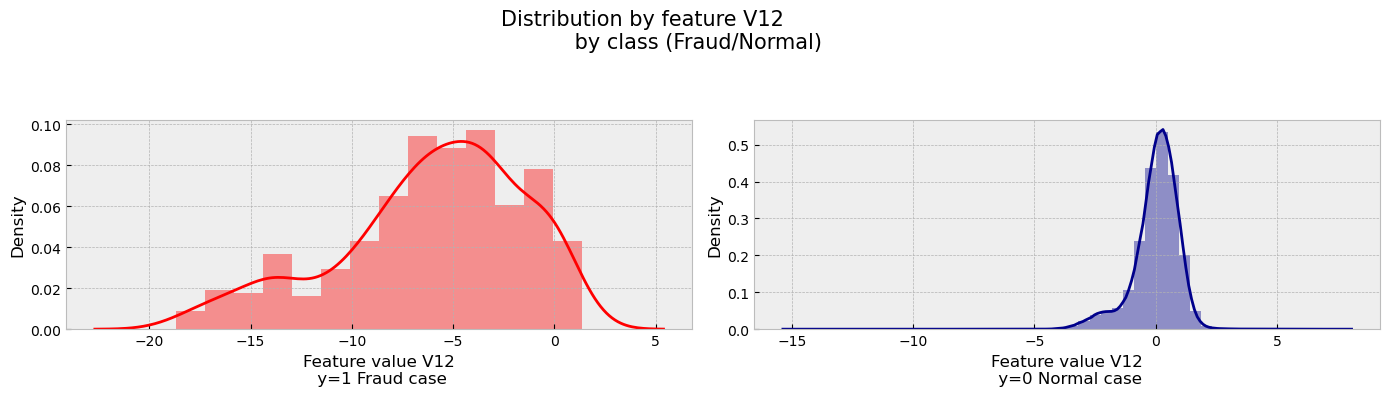

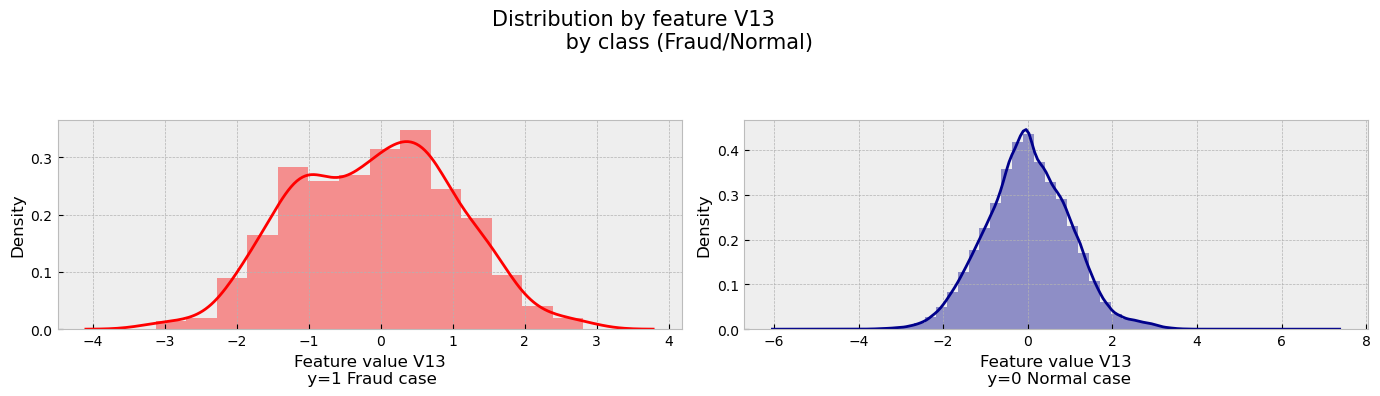

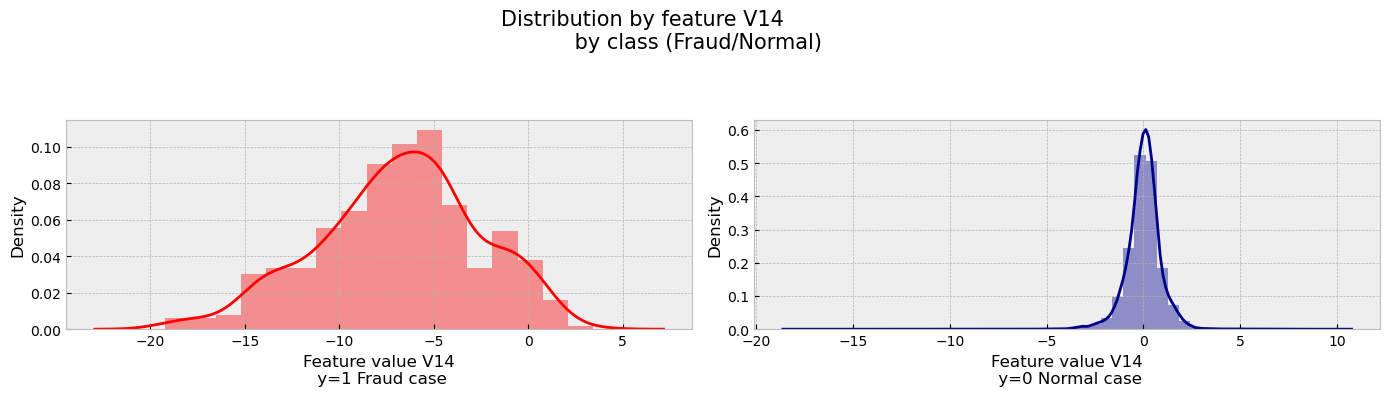

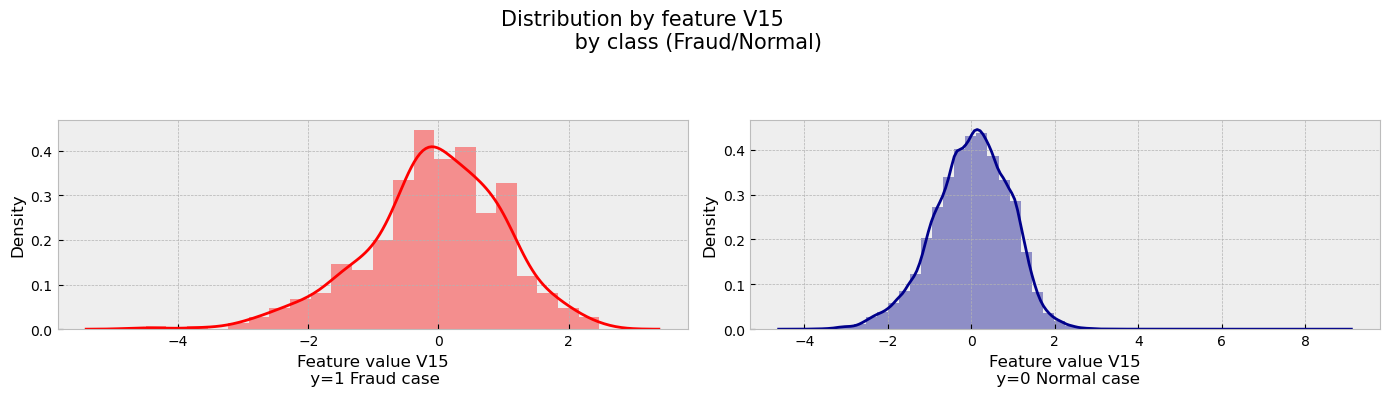

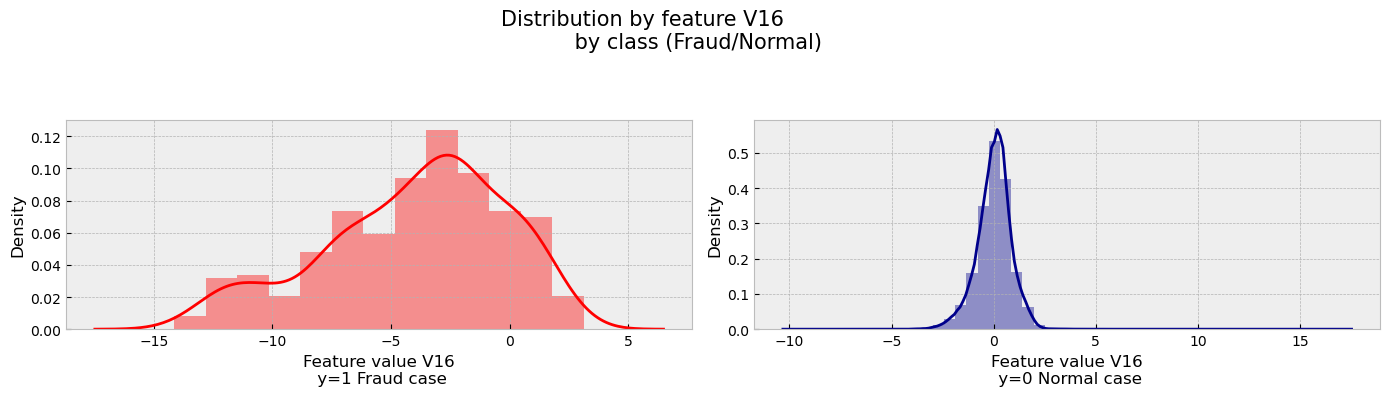

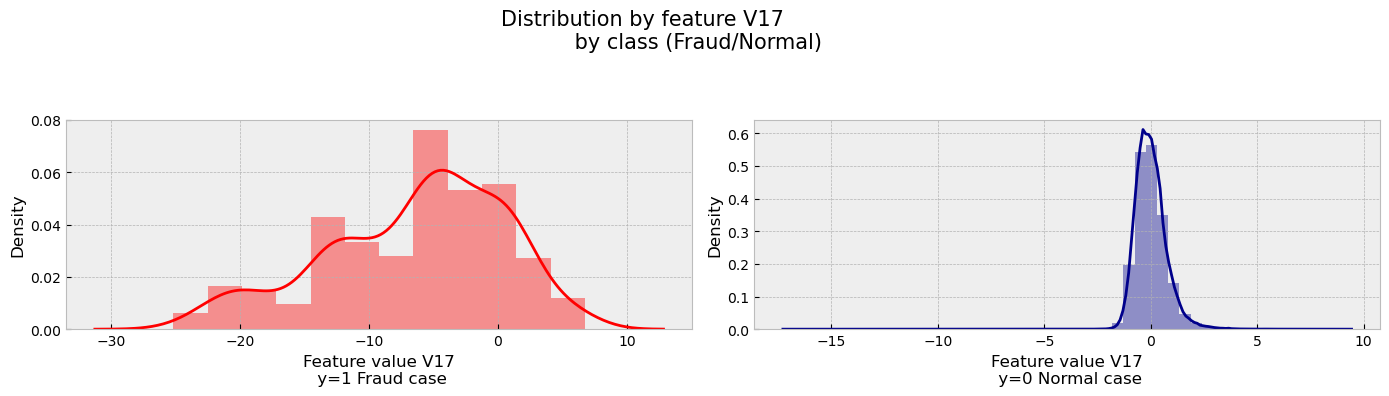

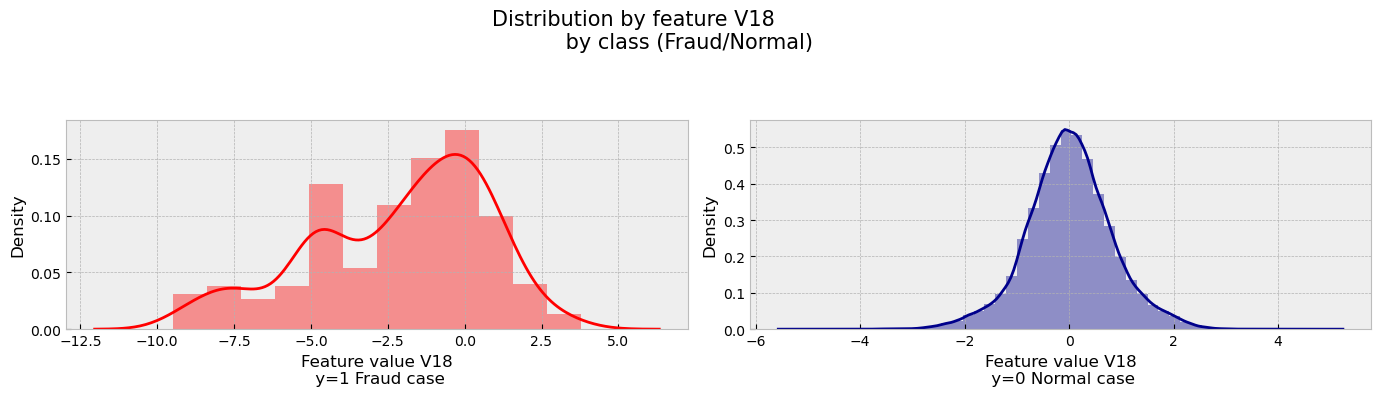

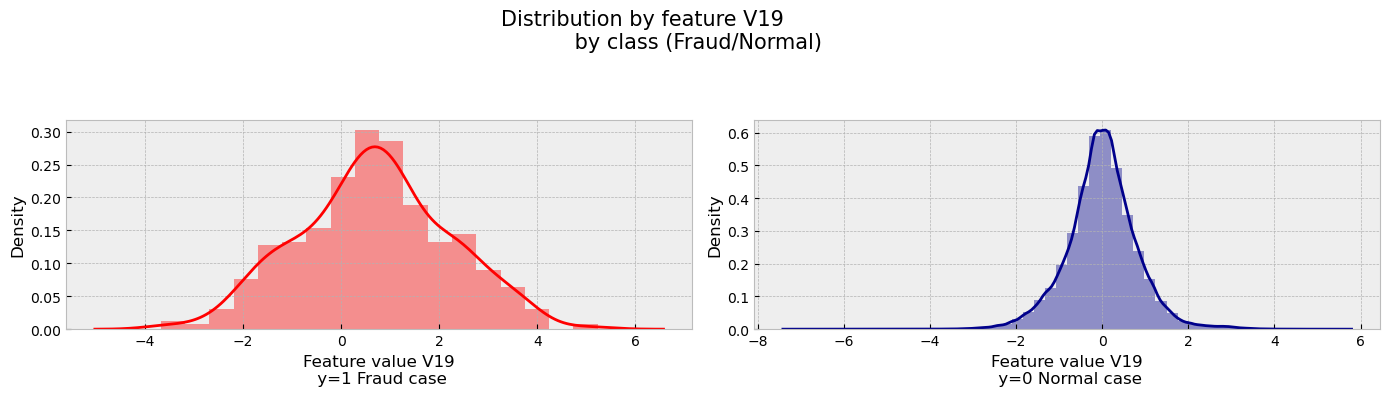

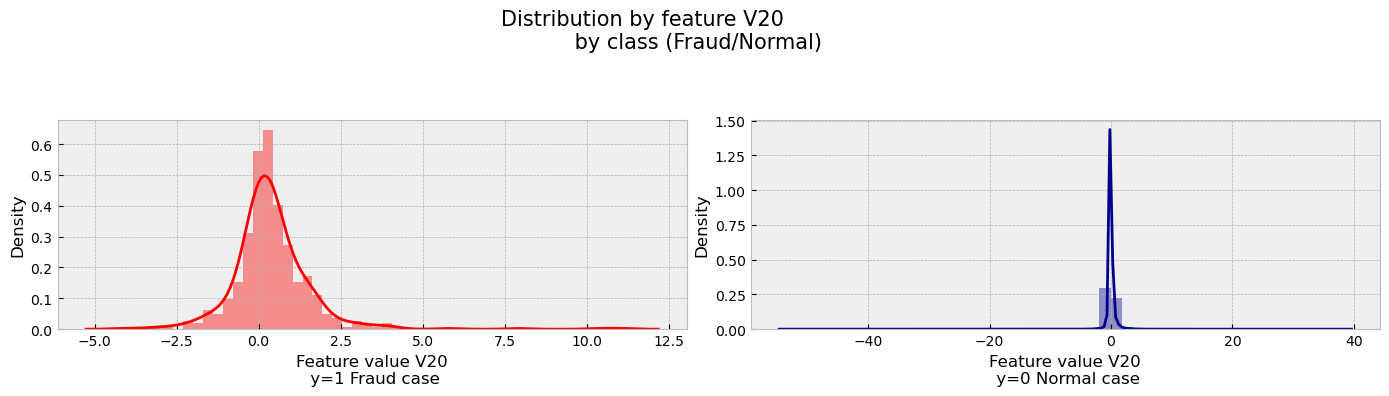

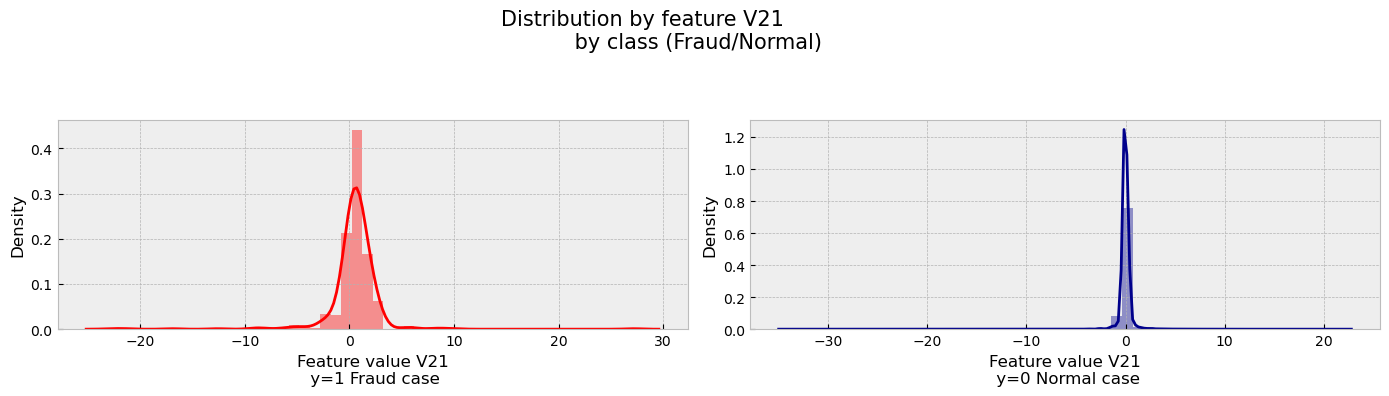

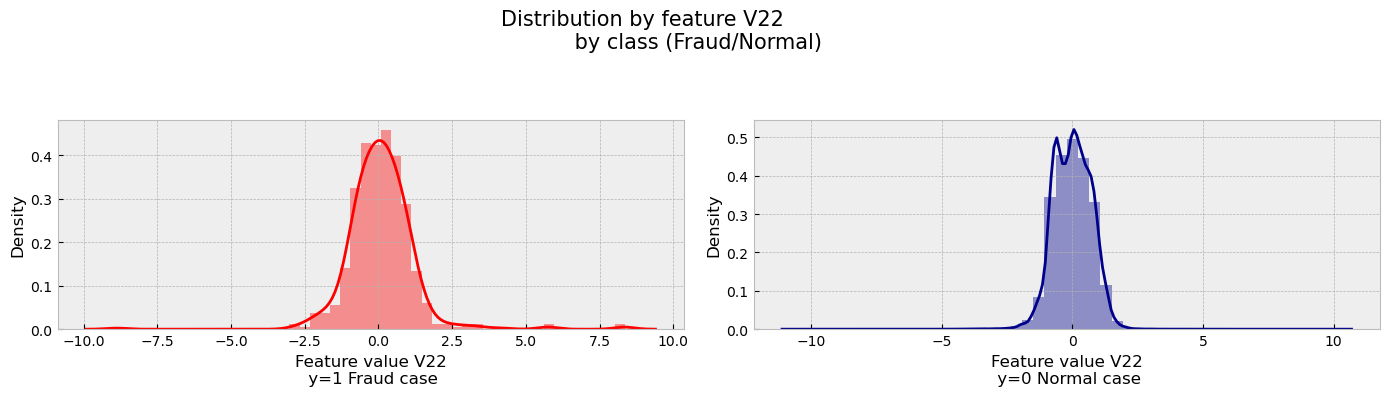

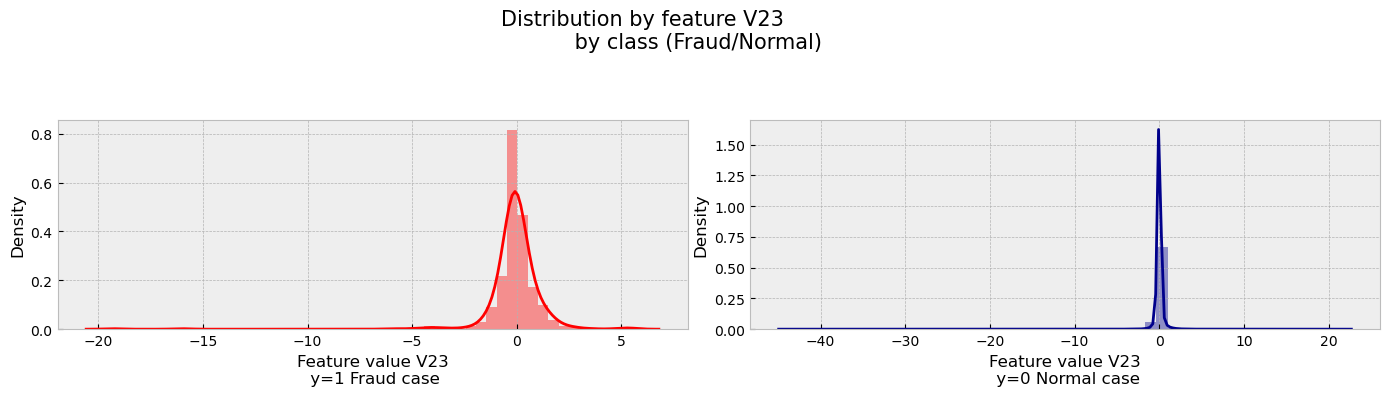

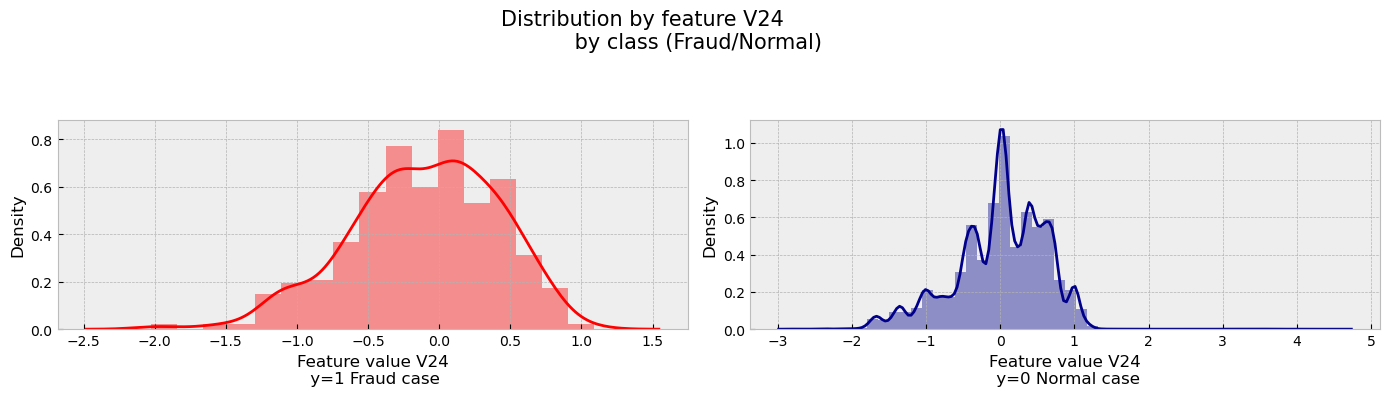

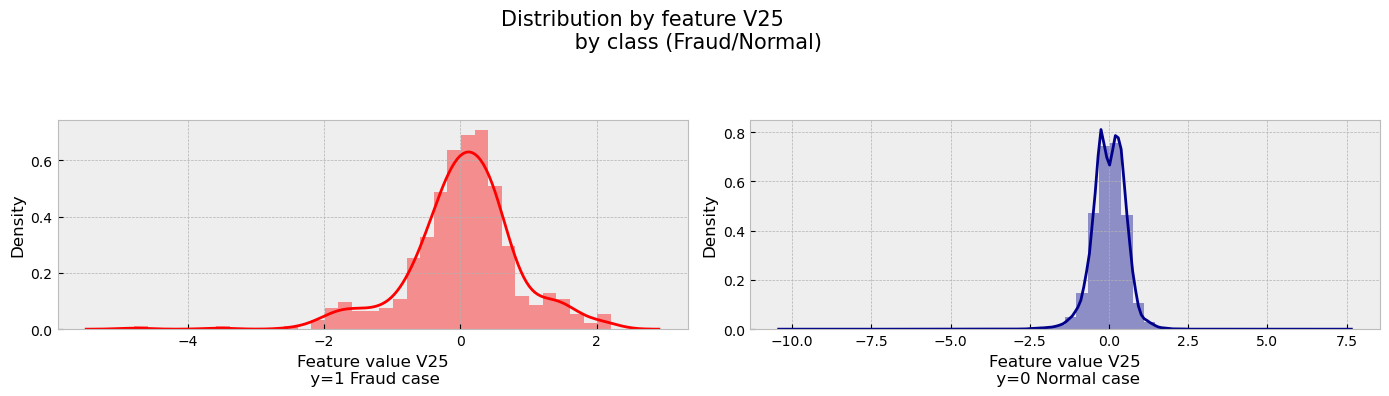

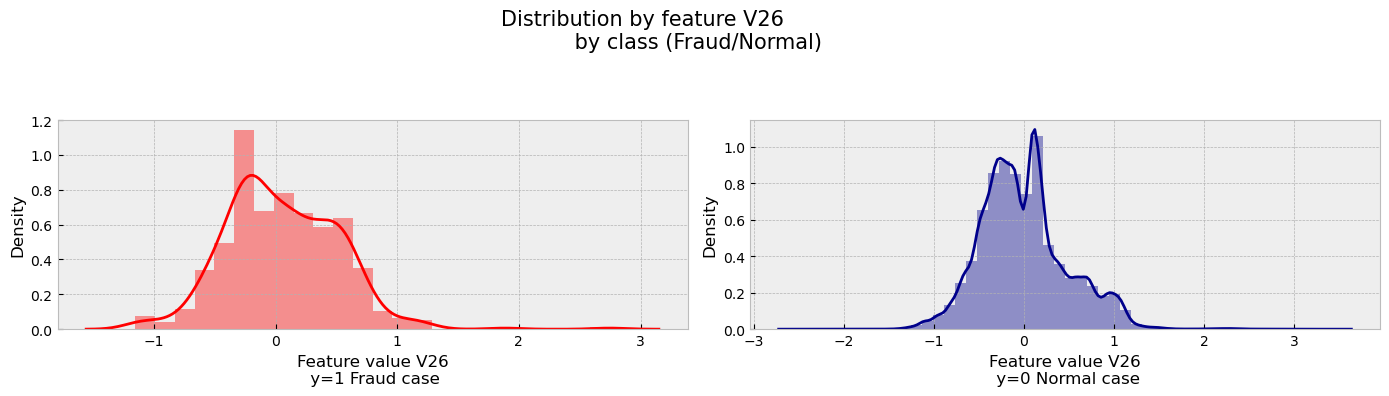

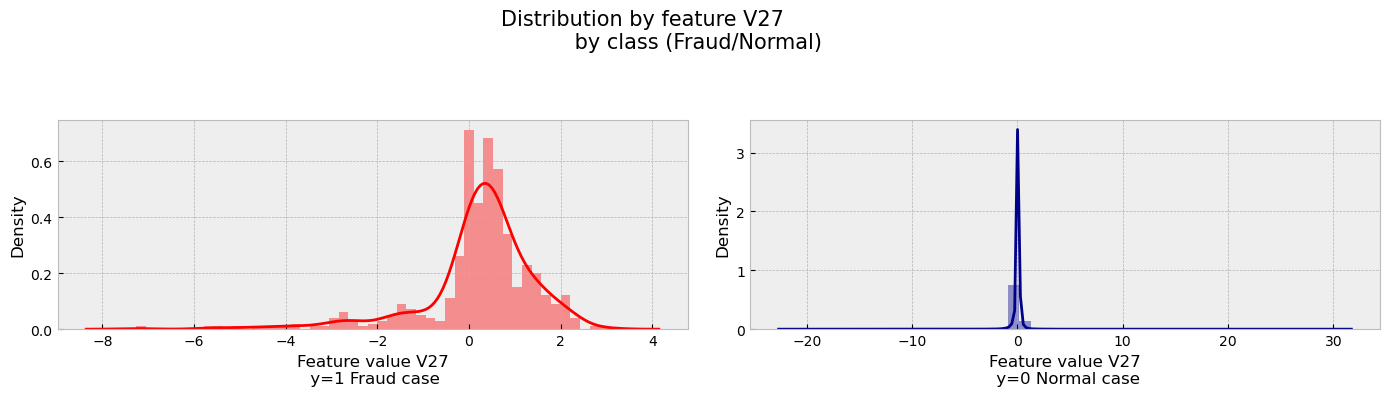

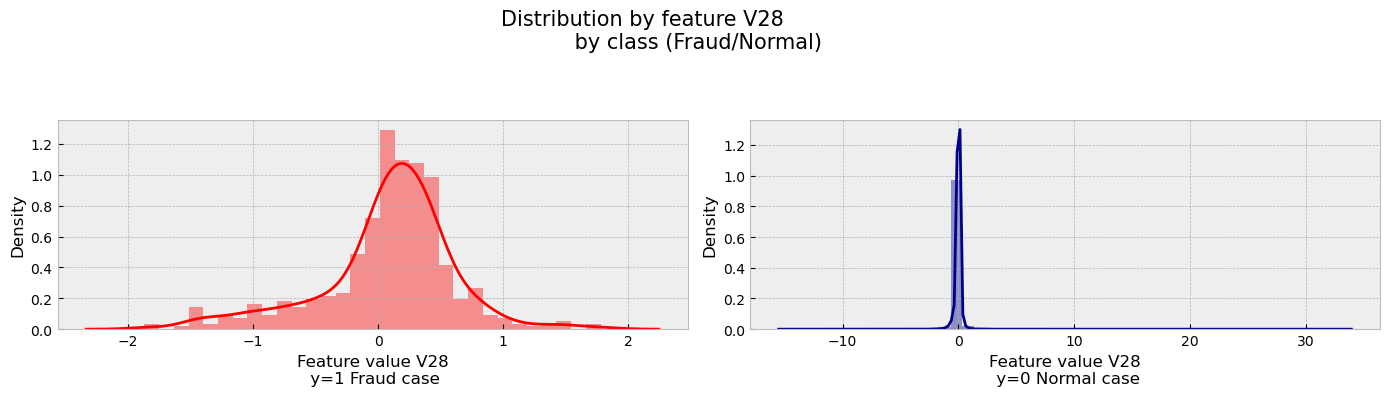

In [30]:
# See all data distribution by Class
plt.style.use('bmh')
for column in data_sc.drop(['Class'],axis=1).columns:
    fig, ax = plt.subplots(1,2, figsize = (14,4),  tight_layout=True, sharey=False, sharex=False)
    sns.distplot(data_sc.query('`Class` == 1')[column].dropna(), hist=True, color='red',ax = ax[0], norm_hist = False)
    sns.distplot(data_sc.query('`Class` == 0')[column].dropna(), hist=True, color='darkblue',ax = ax[1], norm_hist = False)
    ax[0].set_title(' \n')
    ax[1].set_title(' \n')
    ax[0].set_xlabel('Feature value '+ str(column)+ '\n y=1 Fraud case')
    ax[1].set_xlabel('Feature value '+ str(column)+ '\n y=0 Normal case')
    plt.suptitle('Distribution by feature ' + column + '\
                '+'\n by class (Fraud/Normal)', fontsize=15)
    plt.show()

* Due to the huge and well observable difference, it would make sense to split the data to two datasets (separately for frauds) and analyze them both.
I will leave it out for this project, but would consider it in the real case

<a id="standard"></a>
## 2. Standard methods

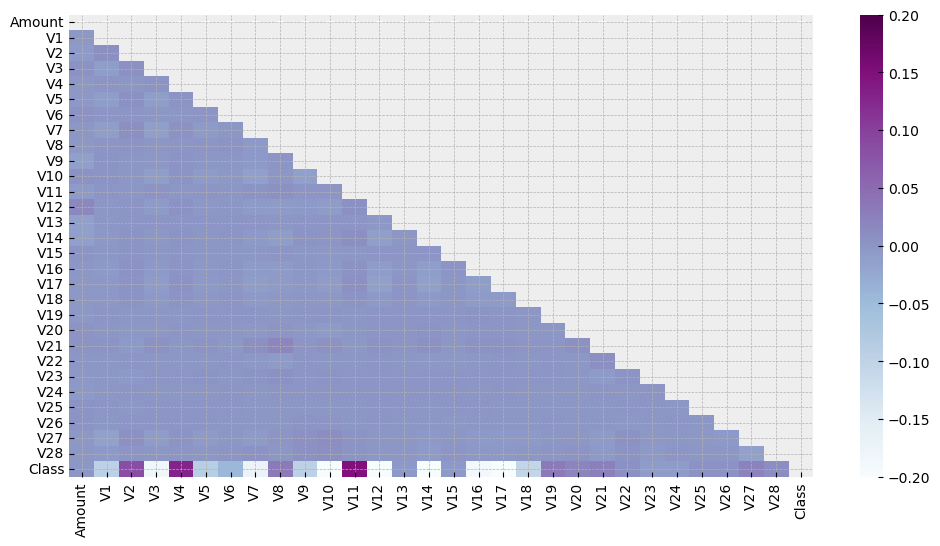

In [47]:
plt.figure(figsize=(12,6))
corr_matrix = data_sc.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))
sns.heatmap(lower, annot=True, fmt='.2f', vmin=-0.2, vmax=0.2, cbar=True, center=0, cmap = "BuPu");

In [48]:
# We can check starting from 0,3/-0,3 corr just as an example, even though it is not really a high correlation
high_corr = [
    column for column in lower.columns if any((lower[column] > 0.25)|(lower[column] < -0.25))
]
high_corr

['V12', 'V14', 'V17']

In [ ]:
other_features = [col for col in data_sc.columns if col not in high_corr and col!='quality']
#other_features

## 3-Sigma method

In [50]:
def outlier_std(data_sc, col, threshold=3):
    mean = data_sc[col].mean()
    std = data_sc[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data_sc[col]>up_bound, data_sc[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [51]:
def get_column_outliers(data_sc, columns=None, function=outlier_std, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data_sc.columns
        
    outliers = pd.Series(data=[False]*len(data_sc), index=data_features.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data_sc, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = True
    
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    comparison_table = comparison_table.sort_values(by='anomalies_percentage', ascending=False)
    
    return comparison_table, outliers

def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))    

In [52]:
data_features = data_sc.iloc[:, :-1]
data_features.head(2)

Amount        V1        V2        V3        V4        V5        V6  \
0  1.774718 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -0.268530  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390   
1 -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095   

        V14       V15       V16       V17       V18       V19       V20  \
0 -0.311169  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412   
1 -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083   

        V21       V22       V23       V24       V25       V26       V27  \
0 -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558   
1 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983   

        V28  
0 -0.021053  
1  0.014724

In [53]:
comparison_table, std_outliers = get_column_outliers(data_features)
anomalies_report(std_outliers)

Total number of outliers: 40079
Percentage of outliers:   14.18%


In [ ]:
# check results - what are the outliers and how many
comparison_table.round

In [55]:
high_corr

['V12', 'V14', 'V17']

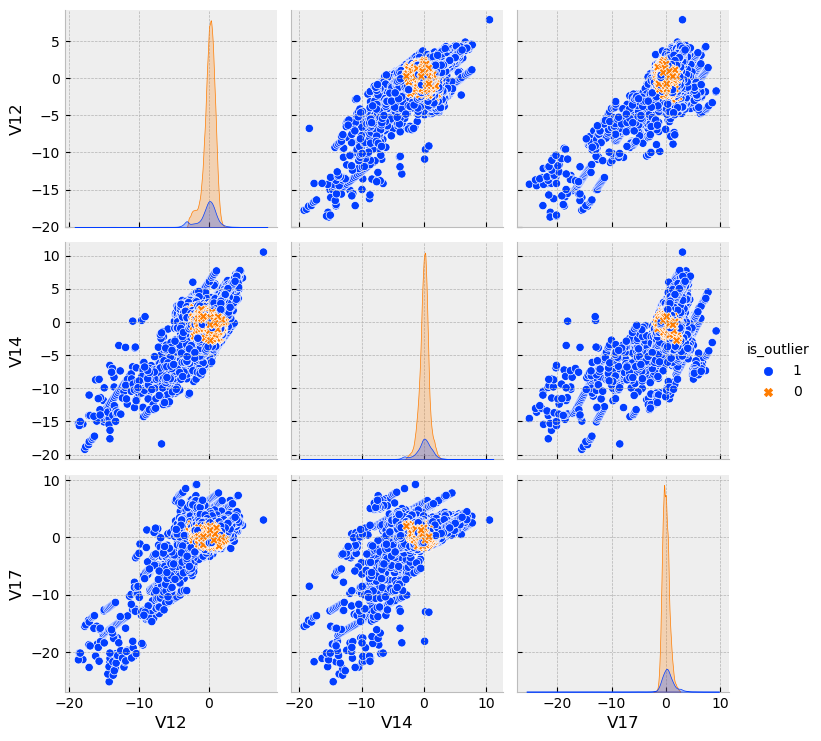

In [56]:
labeled_data = data_features[high_corr].copy()
labeled_data['is_outlier'] = std_outliers
sns.pairplot(data=labeled_data, vars = high_corr,
             hue='is_outlier', hue_order=[1, 0],
             markers=['X', 'o'],  palette='bright');

## Interquartil Range method - Boxplot 

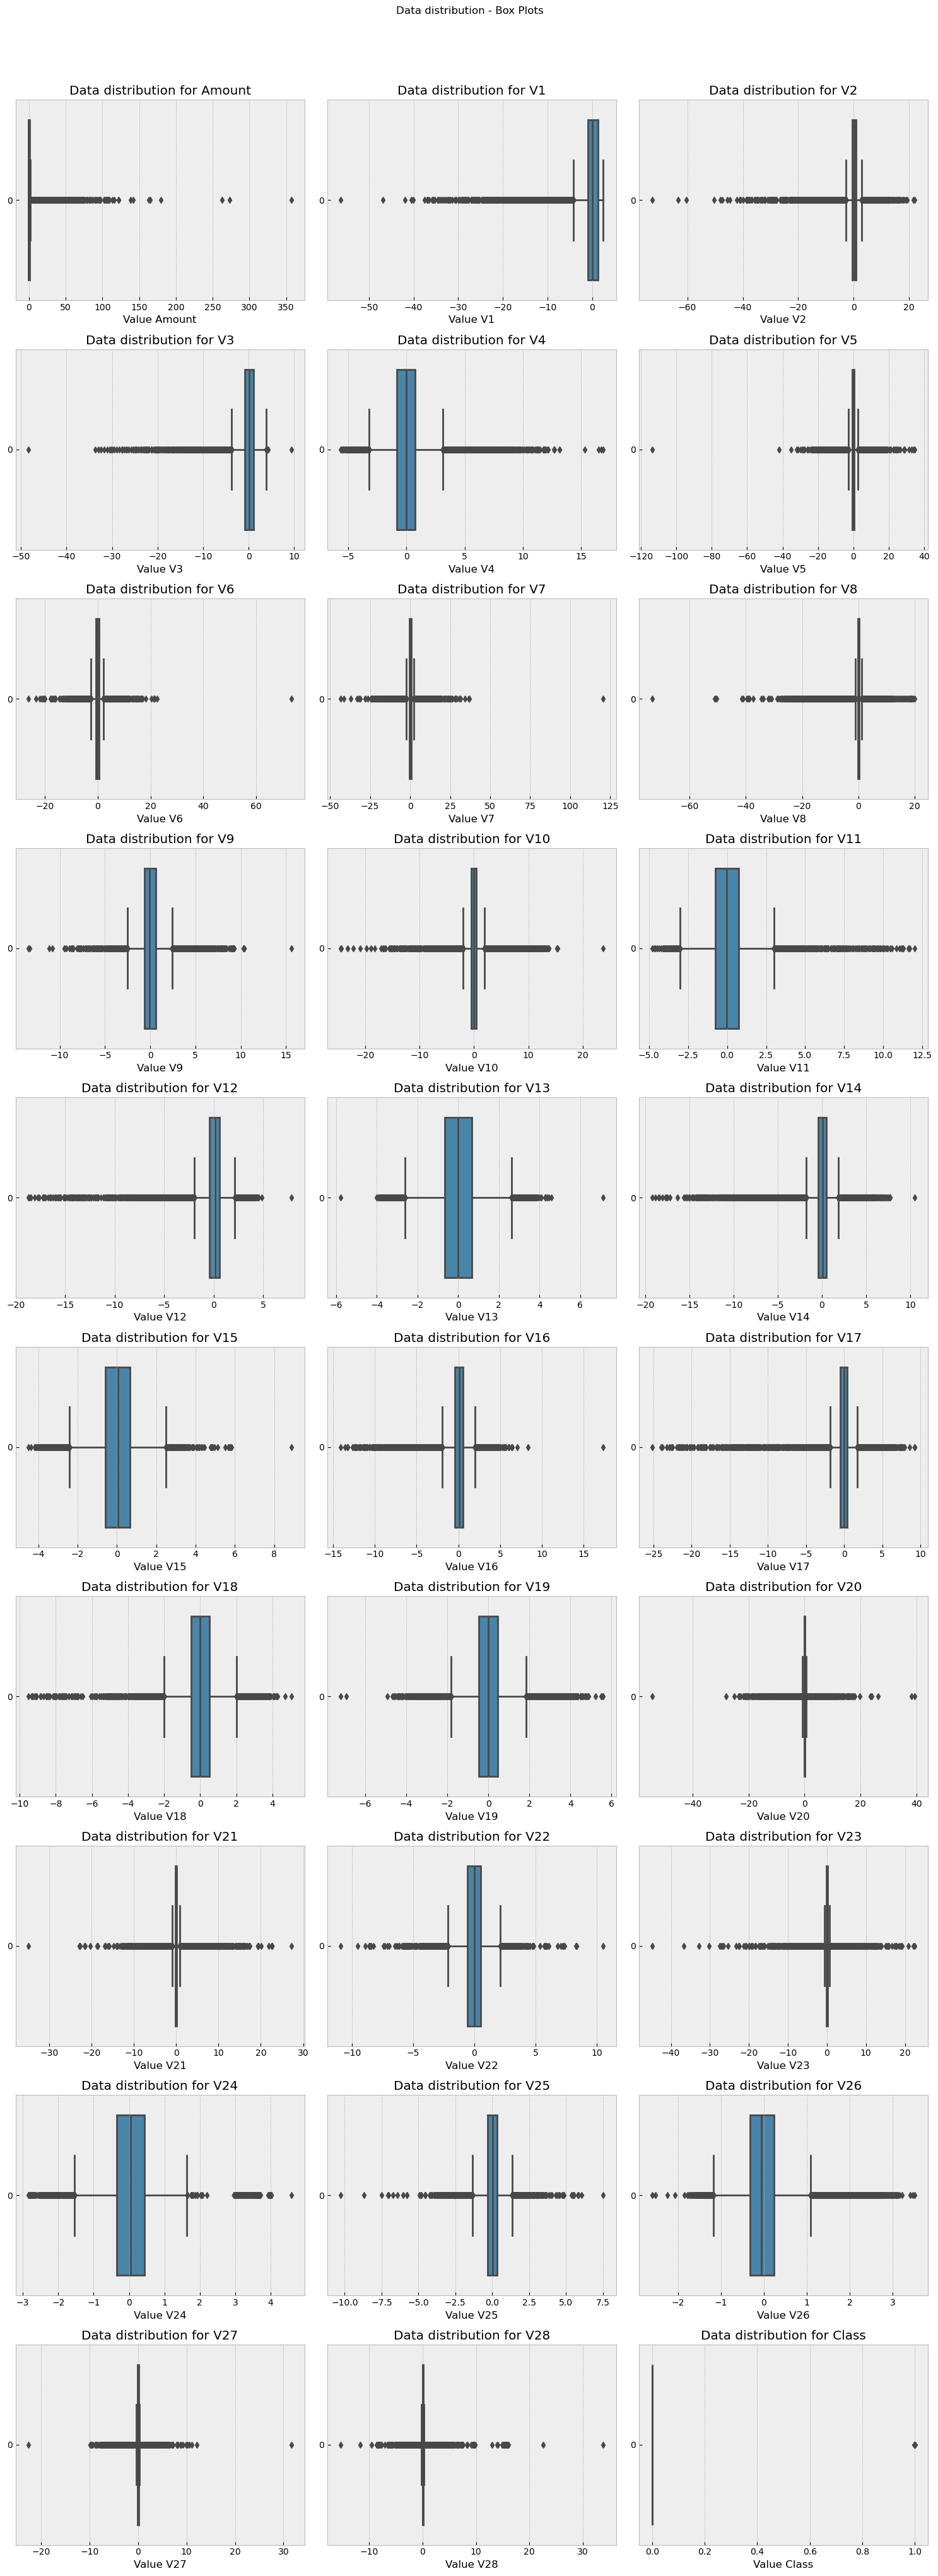

In [57]:
num_columns = len(data_sc.columns)
num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed

# Create subplots with three columns
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 4 * num_rows))
fig.suptitle('Data distribution - Box Plots', y=1.02)

for i, column in enumerate(data_sc.columns):
    row = i // 3
    col = i % 3

    # Create box plot
    sns.boxplot(data_sc[column], ax=axes[row, col], orient='h', saturation=0.7)

    # Set plot title and labels
    axes[row, col].set_title('Data distribution for ' + str(column))
    axes[row, col].set_xlabel('Value ' + column)
    axes[row, col].set_ylabel('')

# Hide empty subplots if any
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

* We can see how many data points can be considered as outliers. For some features - most of the values

In [58]:
def outlier_iqr(data_sc, col, threshold=1.5):
    IQR = data_sc[col].quantile(0.75) - data_sc[col].quantile(0.25)
    up_bound = data_sc[col].quantile(0.75) + (IQR * threshold)
    low_bound = data_sc[col].quantile(0.25) - (IQR * threshold)
    anomalies = pd.concat([data_sc[col]>up_bound, data_sc[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [59]:
comparison_table, iqr_outliers = get_column_outliers(data_features, function=outlier_iqr)
anomalies_report(iqr_outliers)

Total number of outliers: 58706
Percentage of outliers:   20.77%


In [60]:
comparison_table

upper_bound  lower_bound  anomalies_count  anomalies_percentage
Amount  3.771381    -3.227646     18726.0          6.625225            
V27     0.576351    -0.555840     16210.0          5.735069            
V20     1.167816    -1.245836     13209.0          4.673320            
V28     0.471303    -0.445823     12368.0          4.375776            
V8      1.927476    -1.810705     11117.0          3.933175            
V23     1.075320    -1.089615     8105.0           2.867534            
V21     1.428522    -1.470753     6863.0           2.428117            
V6      3.894396    -4.265560     5395.0           1.908741            
V2      4.999890    -4.802000     4419.0           1.563434            
V10     3.421682    -3.502782     3075.0           1.087929            
V7      3.938902    -3.922108     3000.0           1.061395            
V14     3.244654    -3.177289     2332.0           0.825057            
V5      4.517265    -4.597318     2280.0           0.806660            
V1      8.009318    -7.609814     1941.0           0.686722            
V17     3.047237    -3.131826     1419.0           0.502040            
V12     3.689464    -3.479975     1277.0           0.451800            
V9      4.318932    -4.367941     1028.0           0.363705            
V3      6.771648    -6.628832     736.0            0.260395            
V19     3.204977    -3.202688     622.0            0.220062            
V16     3.495942    -3.439222     567.0            0.200604            
V26     1.942517    -2.028932     510.0            0.180437            
V4      5.514267    -5.623431     468.0            0.165578            
V25     2.354906    -2.320848     443.0            0.156733            
V18     3.501879    -3.498365     270.0            0.095526            
V22     3.736877    -3.751890     188.0            0.066514            
V11     5.243835    -5.263167     144.0            0.050947            
V24     2.821215    -2.736214     137.0            0.048470            
V15     4.348309    -4.277990     18.0             0.006368            
V13     4.597450    -4.582130     2.0              0.000708

<a id="clustering"></a>
# 3. Clustering

## 3.1. Distance based

In [61]:
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler

class DistanceOutliers(BaseEstimator):
    """
    -----------
    Parameters:
    
    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)
        
    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile
        
    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)
        
    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

In [ ]:
# Doing dimensionality reduction 
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=50, n_jobs=-1)
tsne_transformed = tsne.fit_transform(data_sc)

plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1]);

In [63]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=95)
euclidian_model.fit(data_sc)
euclidian_outliers = euclidian_model.predict(data_sc)
anomalies_report(euclidian_outliers)

Total number of outliers: 14133
Percentage of outliers:   5.00%


In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=euclidian_outliers);

- Outliers (marked yellow) are not laying really outside of the data

In [65]:
citiblock_model = DistanceOutliers(metric='cityblock', percentile=95)
citiblock_model.fit(data_sc)
cityblock_outliers = citiblock_model.predict(data_sc)
anomalies_report(cityblock_outliers)

labeled_data = data_features.copy()
labeled_data['is_outlier'] = cityblock_outliers

Total number of outliers: 14133
Percentage of outliers:   5.00%


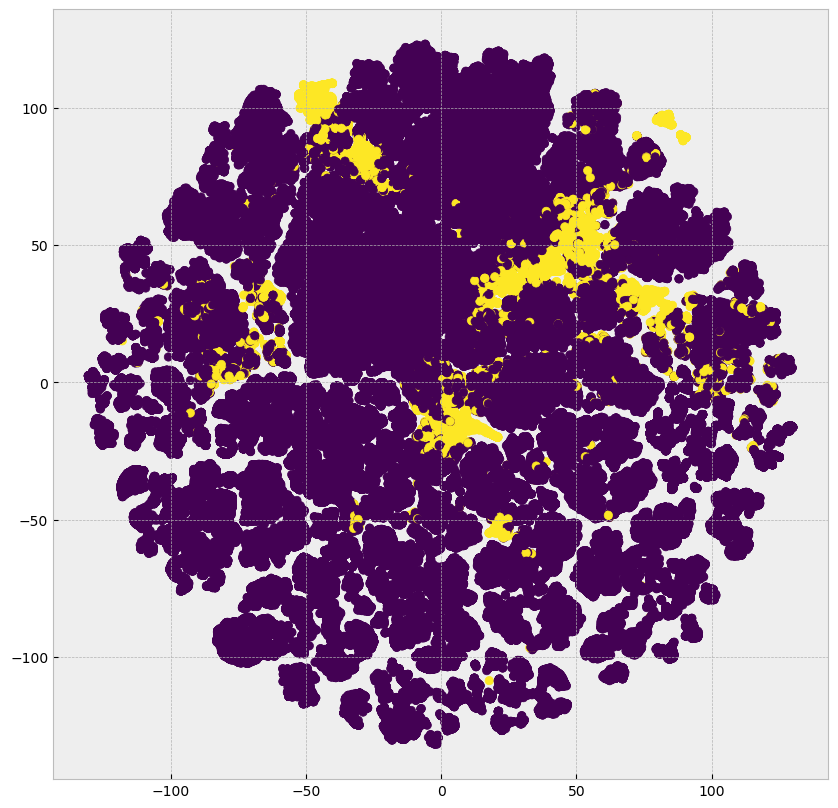

In [66]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=cityblock_outliers);

## 3.2. Density-based - DBSCAN

* I disabled the code below because it requires several hours to run again

In [ ]:
# Initialize variables

#outlier_percentage = 1.
#max_iterations = 70  # Set a maximum number of iterations

#num_clusters = []
#anomaly_percentage = []

# Start with a small epsilon and increase it
#eps = 0.05
#eps_history = [eps]

#iteration = 0
#while outlier_percentage > 0.1 and iteration < max_iterations:
#    model = DBSCAN(eps=eps).fit(data_sc)
#    labels = model.labels_
#    num_clusters.append(len(np.unique(labels)) - 1)
#    labels = np.array([1 if label == -1 else 0 for label in labels])
#Calculate the current percentage of "noise"
#    outlier_percentage = sum(labels == 1) / len(labels)

    # Print statements for debugging
#    print(f"Iteration {iteration + 1}:")
#    print(f"  Epsilon = {eps}")
#    print(f"  Number of clusters = {len(np.unique(labels)) - 1}")
#    print(f"  Outlier Percentage = {outlier_percentage}")

#    eps += 0.05
#    eps_history.append(eps)
#    anomaly_percentage.append(outlier_percentage)

#    iteration += 1

#model = DBSCAN(eps)
#model.fit(data_sc)
#density_outlier = np.array([1 if label == -1 else 0 for label in model.labels_])



#Iteration 1:
#  Epsilon = 0.05
#  Number of clusters = 1
#  Outlier Percentage = 0.9980328820047621
#

#Iteration 50:
#  Epsilon = 2.499999999999999
#  Number of clusters = 1
#  Outlier Percentage = 0.11096880561265465
#Iteration 51:
#  Epsilon = 2.549999999999999
#  Number of clusters = 1
#  Outlier Percentage = 0.10458628607414902
#Iteration 52:
#  Epsilon = 2.5999999999999988
#  Number of clusters = 1
#  Outlier Percentage = 0.09906349616305851

In [68]:
eps_history = [0.05,
 0.1,
 0.15000000000000002,
 0.2,
 0.25,
 0.3,
 0.35,
 0.39999999999999997,
 0.44999999999999996,
 0.49999999999999994,
 0.5499999999999999,
 0.6,
 0.65,
 0.7000000000000001,
 0.7500000000000001,
 0.8000000000000002,
 0.8500000000000002,
 0.9000000000000002,
 0.9500000000000003,
 1.0000000000000002,
 1.0500000000000003,
 1.1000000000000003,
 1.1500000000000004,
 1.2000000000000004,
 1.2500000000000004,
 1.3000000000000005,
 1.3500000000000005,
 1.4000000000000006,
 1.4500000000000006,
 1.5000000000000007,
 1.5500000000000007,
 1.6000000000000008,
 1.6500000000000008,
 1.7000000000000008,
 1.7500000000000009,
 1.800000000000001,
 1.850000000000001,
 1.900000000000001,
 1.950000000000001,
 2.000000000000001,
 2.0500000000000007,
 2.1000000000000005,
 2.1500000000000004,
 2.2,
 2.25,
 2.3,
 2.3499999999999996,
 2.3999999999999995,
 2.4499999999999993,
 2.499999999999999,
 2.549999999999999,
 2.5999999999999988,
 2.6499999999999986]

In [77]:
eps= 2.5999999999999988

In [78]:
# train model
model = DBSCAN(eps)
model.fit(data_sc)
density_outlier = np.array([1 if label == -1 else 0 for label in model.labels_])

In [79]:
anomalies_report(density_outlier)

Total number of outliers: 26953
Percentage of outliers:   9.54%


In [151]:
#Disabled due to have computational resourses required

#iterations = eps_history[:-1]
#num_clusters = 1
#fig, ax1 = plt.subplots()

#color = 'tab:red'
#ax1.set_xlabel('epsilon')
#ax1.set_ylabel('number of clusters', color=color)
#ax1.plot(iterations, num_clusters, color=color)
#ax1.tick_params(axis='y', labelcolor=color)

#ax2 = ax1.twinx()  

#color = 'tab:blue'
#ax2.set_ylabel('anomaly percentage', color=color)  
#ax2.plot(iterations, anomaly_percentage, color=color)
#ax2.tick_params(axis='y', labelcolor=color)

#fig.tight_layout()  
#plt.show()

In [ ]:
#labeled_data = data_features.copy()
#labeled_data = labeled_data.iloc[:, :-2]
#labeled_data

In [81]:
labeled_data = data_features.copy()
labeled_data['is_outlier'] = density_outlier

In [82]:
labeled_data.columns

Index(['Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'is_outlier'],
      dtype='object')

In [92]:
#[other_features[:-1]]

In [ ]:
# due to a large dataset, I decreased the volume to a sample with n=5
sns.pairplot(data=labeled_data.sample(n=5), vars = other_features[:-1],
             hue='is_outlier', hue_order=[1, 0],
             markers=['X', 'o'],  palette='bright');

- DBSCAN is not the best method for this dataset

<a id="unsupervised"></a>
# 4. Unsupervised model-based

## 4.1. One-Class SVM

In [95]:
from sklearn.svm import OneClassSVM
one_class_svm = OneClassSVM(nu=0.05, gamma='auto')
one_class_svm.fit(data_sc)
svm_outliers = one_class_svm.predict(data_sc)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

In [96]:
anomalies_report(svm_outliers)

Total number of outliers: 14145
Percentage of outliers:   5.00%


In [97]:
labeled_data = data_features.copy()
labeled_data

Amount        V1        V2        V3        V4        V5        V6  \
0       1.774718 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1      -0.268530  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2       4.959811 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       1.411487 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       0.667362 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...          ...       ...       ...       ...       ...       ...       ...   
283721 -0.295230  1.850363 -0.641588 -1.305172  0.263061  1.651034  4.228471   
283722  0.038798  2.066871 -0.007859 -1.386508  0.256946  0.362501 -0.611518   
283723  0.638020  0.432610  0.615945  1.224978  1.473472 -0.954166 -0.738944   
283724 -0.166875 -0.538562  1.710113 -1.070982  1.007657  1.095477 -0.367146   
283725  2.711723  2.231427 -0.677544 -2.816201 -1.147647  0.561969 -0.918121   

              V7        V8        V9       V10       V11       V12       V13  \
0       0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390   
1      -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095   
2       0.791461  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293   
3       0.237609  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757   
4       0.592941 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852   
...          ...       ...       ...       ...       ...       ...       ...   
283721 -1.349456  1.162268  1.012739  0.150302 -0.213996  0.403785  0.044469   
283722  0.227138 -0.260403  0.659132 -0.129342 -0.935563  0.749528  0.730372   
283723 -0.115551 -0.182808  0.341124  0.247176  0.282277  0.918567  1.069320   
283724  1.055741  0.381718 -1.112335 -0.683228  0.851711  0.212513 -0.749143   
283725  0.312233 -0.396894 -1.134990  1.119557  0.309874 -0.765435 -1.133718   

             V14       V15       V16       V17       V18       V19       V20  \
0      -0.311169  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412   
1      -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083   
2      -0.165946  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980   
3      -0.287924 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038   
4      -1.119670  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542   
...          ...       ...       ...       ...       ...       ...       ...   
283721 -0.025141  1.089147  0.510850 -0.870418  0.156155 -0.818556 -0.098314   
283722  0.183846  0.167739 -0.258476 -0.476339 -0.603392  0.302105 -0.157010   
283723 -0.215446  1.708294 -1.138941  0.632056 -0.174860  2.130118  0.130100   
283724 -0.434976 -0.818116 -0.371026  1.278659  0.910127  0.813829  0.053883   
283725  0.808770 -1.039454  0.488704  0.148033 -0.924663  1.247324 -0.011263   

             V21       V22       V23       V24       V25       V26       V27  \
0      -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558   
1      -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983   
2       0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353   
3      -0.108300  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723   
4      -0.009431  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422   
...          ...       ...       ...       ...       ...       ...       ...   
283721  0.079511  0.206796  0.285683  0.660314 -0.313416 -0.732554  0.092040   
283722 -0.270977 -0.639884  0.277945  0.456218 -0.035825 -0.603713 -0.012748   
283723 -0.016605  0.146782  0.389104  0.934141 -1.052030 -0.334008 -0.159710   
283724  0.130345  0.459374 -0.173834  0.577681  0.032455 -0.424575  0.313450   
283725  0.498277  1.325490 -0.290880  0.269487  0.775797  0.279231 -0.118604   

             V28  
0      -0.021053  
1       0.014724  
2      -0.059752  
3       0.061458  
4       0.215153  
...          ...  
283721 -0.020500  
283722 -0.0429

In [ ]:
# due to a large dataset, I decreased the volume to a sample with n=5
labeled_data['is_outlier'] = svm_outliers

sns.pairplot(data=labeled_data.sample(n=5), vars = other_features[:-1],
             hue='is_outlier', hue_order=[1, 0],
             markers=['X', 'o'],  palette='bright');

## 4.2. Isolation Forest 

In [99]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, 
                                   max_features=1.0, bootstrap=True)
isolation_forest.fit(data_sc)

isolation_outliers = isolation_forest.predict(data_sc)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

In [100]:
anomalies_report(isolation_outliers)

Total number of outliers: 14133
Percentage of outliers:   5.00%


In [101]:
labeled_data = data_features.copy()
labeled_data

Amount        V1        V2        V3        V4        V5        V6  \
0       1.774718 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1      -0.268530  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2       4.959811 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       1.411487 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       0.667362 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...          ...       ...       ...       ...       ...       ...       ...   
283721 -0.295230  1.850363 -0.641588 -1.305172  0.263061  1.651034  4.228471   
283722  0.038798  2.066871 -0.007859 -1.386508  0.256946  0.362501 -0.611518   
283723  0.638020  0.432610  0.615945  1.224978  1.473472 -0.954166 -0.738944   
283724 -0.166875 -0.538562  1.710113 -1.070982  1.007657  1.095477 -0.367146   
283725  2.711723  2.231427 -0.677544 -2.816201 -1.147647  0.561969 -0.918121   

              V7        V8        V9       V10       V11       V12       V13  \
0       0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390   
1      -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095   
2       0.791461  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293   
3       0.237609  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757   
4       0.592941 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852   
...          ...       ...       ...       ...       ...       ...       ...   
283721 -1.349456  1.162268  1.012739  0.150302 -0.213996  0.403785  0.044469   
283722  0.227138 -0.260403  0.659132 -0.129342 -0.935563  0.749528  0.730372   
283723 -0.115551 -0.182808  0.341124  0.247176  0.282277  0.918567  1.069320   
283724  1.055741  0.381718 -1.112335 -0.683228  0.851711  0.212513 -0.749143   
283725  0.312233 -0.396894 -1.134990  1.119557  0.309874 -0.765435 -1.133718   

             V14       V15       V16       V17       V18       V19       V20  \
0      -0.311169  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412   
1      -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083   
2      -0.165946  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980   
3      -0.287924 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038   
4      -1.119670  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542   
...          ...       ...       ...       ...       ...       ...       ...   
283721 -0.025141  1.089147  0.510850 -0.870418  0.156155 -0.818556 -0.098314   
283722  0.183846  0.167739 -0.258476 -0.476339 -0.603392  0.302105 -0.157010   
283723 -0.215446  1.708294 -1.138941  0.632056 -0.174860  2.130118  0.130100   
283724 -0.434976 -0.818116 -0.371026  1.278659  0.910127  0.813829  0.053883   
283725  0.808770 -1.039454  0.488704  0.148033 -0.924663  1.247324 -0.011263   

             V21       V22       V23       V24       V25       V26       V27  \
0      -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558   
1      -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983   
2       0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353   
3      -0.108300  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723   
4      -0.009431  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422   
...          ...       ...       ...       ...       ...       ...       ...   
283721  0.079511  0.206796  0.285683  0.660314 -0.313416 -0.732554  0.092040   
283722 -0.270977 -0.639884  0.277945  0.456218 -0.035825 -0.603713 -0.012748   
283723 -0.016605  0.146782  0.389104  0.934141 -1.052030 -0.334008 -0.159710   
283724  0.130345  0.459374 -0.173834  0.577681  0.032455 -0.424575  0.313450   
283725  0.498277  1.325490 -0.290880  0.269487  0.775797  0.279231 -0.118604   

             V28  
0      -0.021053  
1       0.014724  
2      -0.059752  
3       0.061458  
4       0.215153  
...          ...  
283721 -0.020500  
283722 -0.0429

In [102]:
data_features.columns
#other_features = other_features.pop('Class')

Index(['Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [ ]:
# due to a large dataset, I decreased the volume to a sample with n=5
labeled_data = data_features.copy()
labeled_data['is_outlier'] = isolation_outliers
sns.pairplot(data=labeled_data.sample(n=5), vars=other_features[:-1],
             hue='is_outlier', hue_order=[1, 0],
             markers=['X', 'o'], palette='bright')

In [ ]:
#labeled_data = data_features.copy()
#labeled_data['is_outlier'] = isolation_outliers
#sns.pairplot(data=labeled_data, vars = other_features[:-1],
#             hue='is_outlier', hue_order=[1, 0],
#             markers=['X', 'o'],  palette='bright');

<a id="results"></a>
# 5. Results of all unsupervised methods

In [105]:
summary = np.concatenate((
    [std_outliers], 
    [iqr_outliers], 
    [euclidian_outliers], 
    [cityblock_outliers],
    [density_outlier],
    [svm_outliers],
    [isolation_outliers]
))

In [106]:
summary = pd.DataFrame(
    summary.T, 
    columns=['std', 'iqr', 'euclid', 'cityblock', 'dbscan', 'svm', 'isolation']
)
summary.head()

std  iqr  euclid  cityblock  dbscan  svm  isolation
0  0    0    0       0          0       0    0        
1  0    0    0       0          0       0    0        
2  1    1    0       0          1       0    0        
3  0    0    0       0          0       0    0        
4  0    0    0       0          0       0    0

In [161]:
summary.sample(10)

std  iqr  euclid  cityblock  dbscan  svm  isolation
16567   0    0    0       0          0       0    0        
73066   0    0    0       0          0       0    0        
175547  1    1    0       0          1       1    0        
232577  0    1    0       0          0       0    0        
34772   0    1    0       0          0       0    0        
98179   0    0    0       0          0       0    0        
173924  0    0    0       0          0       0    0        
104216  0    0    0       0          0       0    0        
77849   0    0    0       0          0       0    0        
269395  0    0    0       0          0       0    0

In [107]:
summary.sum(axis=1).value_counts()

0    209885
1    34512 
2    14699 
3    7074  
7    6909  
6    4090  
4    3143  
5    2335  
dtype: int64

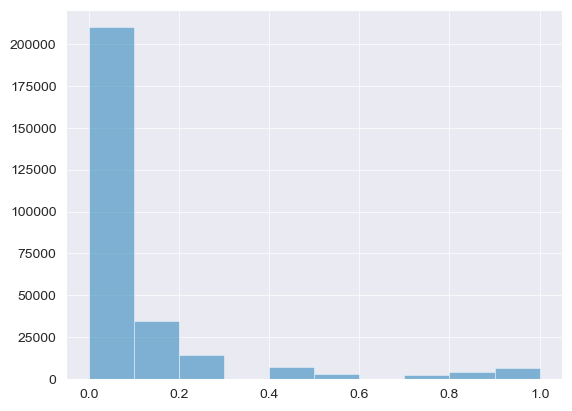

In [158]:
# This diagram will show how many algorythms were agreed with the outliers data points
outlier_score = summary.mean(axis=1)
plt.hist(outlier_score, alpha=0.6);

## All combined - Algorithms ensemble

In [ ]:
#labeled_data = data_features.copy()
#labeled_data['outlier_score'] = simple_score

#custom_palette = {0:'g', 0.5:'b', 1.0:'r'}

#sns.pairplot(data=labeled_data, vars=other_features[:-1], 
#             hue='outlier_score',
#             hue_order=[1, 0.5, 0]
             #palette=custom_palette
#)

In [ ]:
other_features[:-1]

In [ ]:
labeled_data

In [ ]:
# We can combine different methods
simple_score = outlier_score.apply(lambda x: 0 if x < 0.4 else 0.5 if x < 0.8 else 1)
simple_score.unique()
labeled_data = data_features.copy()
labeled_data['outlier_score'] = simple_score

# Check the distribution of outlier scores
print(labeled_data['outlier_score'].value_counts())

# Print unique values and their counts
print(labeled_data['outlier_score'].unique())

# Plot without custom palette
#sns.pairplot(data=labeled_data, vars=other_features[:-1], hue='outlier_score')

# Subset the data
subset_data = labeled_data.sample(frac=0.1)  # Adjust the fraction as needed

# Plot with subset data
sns.pairplot(data=subset_data, vars=other_features[:-1], hue='outlier_score')


* due to very many features in the dataset the diagram is not readable
* we can see from the table above that:
    - number of 'good' data records is 258099, 
    - 50/50 - 12511 data records, 
    - and 10962 where all algorythms consider these records as outliers

0    251610
1    15813 
3    8970  
2    6254  
dtype: int64

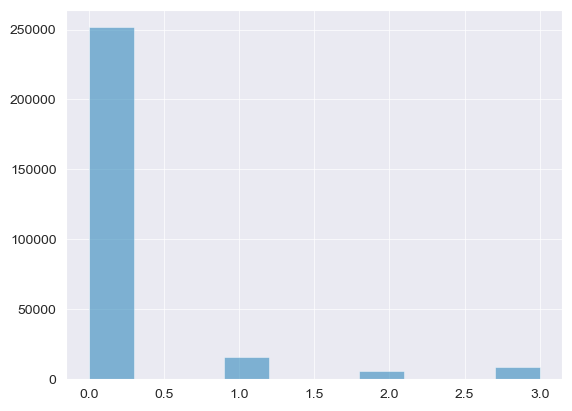

In [164]:
# repeat the same for three more advanced methods
outliers_score_model_based = summary[['dbscan', 'svm', 'isolation']].sum(axis=1)
plt.hist(outliers_score_model_based, alpha=0.6);
outliers_score_model_based.value_counts()

* Unfortunately, even now there are too many points considered as outliers - 8970  records where all three most powerfull algorythms voted for

<a id="catboost"></a>
# 6. Supervised learning - Catboost classificator

* We can check if standard supervised learning (knowing the class) can manage to predict correctly

In [111]:
data_sc

Amount        V1        V2        V3        V4        V5        V6  \
0       1.774718 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1      -0.268530  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2       4.959811 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       1.411487 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       0.667362 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...          ...       ...       ...       ...       ...       ...       ...   
283721 -0.295230  1.850363 -0.641588 -1.305172  0.263061  1.651034  4.228471   
283722  0.038798  2.066871 -0.007859 -1.386508  0.256946  0.362501 -0.611518   
283723  0.638020  0.432610  0.615945  1.224978  1.473472 -0.954166 -0.738944   
283724 -0.166875 -0.538562  1.710113 -1.070982  1.007657  1.095477 -0.367146   
283725  2.711723  2.231427 -0.677544 -2.816201 -1.147647  0.561969 -0.918121   

              V7        V8        V9       V10       V11       V12       V13  \
0       0.239599  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390   
1      -0.078803  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095   
2       0.791461  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293   
3       0.237609  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757   
4       0.592941 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852   
...          ...       ...       ...       ...       ...       ...       ...   
283721 -1.349456  1.162268  1.012739  0.150302 -0.213996  0.403785  0.044469   
283722  0.227138 -0.260403  0.659132 -0.129342 -0.935563  0.749528  0.730372   
283723 -0.115551 -0.182808  0.341124  0.247176  0.282277  0.918567  1.069320   
283724  1.055741  0.381718 -1.112335 -0.683228  0.851711  0.212513 -0.749143   
283725  0.312233 -0.396894 -1.134990  1.119557  0.309874 -0.765435 -1.133718   

             V14       V15       V16       V17       V18       V19       V20  \
0      -0.311169  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412   
1      -0.143772  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083   
2      -0.165946  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980   
3      -0.287924 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038   
4      -1.119670  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542   
...          ...       ...       ...       ...       ...       ...       ...   
283721 -0.025141  1.089147  0.510850 -0.870418  0.156155 -0.818556 -0.098314   
283722  0.183846  0.167739 -0.258476 -0.476339 -0.603392  0.302105 -0.157010   
283723 -0.215446  1.708294 -1.138941  0.632056 -0.174860  2.130118  0.130100   
283724 -0.434976 -0.818116 -0.371026  1.278659  0.910127  0.813829  0.053883   
283725  0.808770 -1.039454  0.488704  0.148033 -0.924663  1.247324 -0.011263   

             V21       V22       V23       V24       V25       V26       V27  \
0      -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558   
1      -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983   
2       0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353   
3      -0.108300  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723   
4      -0.009431  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422   
...          ...       ...       ...       ...       ...       ...       ...   
283721  0.079511  0.206796  0.285683  0.660314 -0.313416 -0.732554  0.092040   
283722 -0.270977 -0.639884  0.277945  0.456218 -0.035825 -0.603713 -0.012748   
283723 -0.016605  0.146782  0.389104  0.934141 -1.052030 -0.334008 -0.159710   
283724  0.130345  0.459374 -0.173834  0.577681  0.032455 -0.424575  0.313450   
283725  0.498277  1.325490 -0.290880  0.269487  0.775797  0.279231 -0.118604   

             V28  Class  
0      -0.021053  0.0    
1       0.014724  0.0    
2      -0.059752  0.0    
3       0.061458  0.0    
4       0.215153  0.0    
...       

In [112]:
x = data_sc.drop(columns=['Class'], axis=1)
y = data_sc['Class']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,  stratify = data_sc['Class'], shuffle=True)

In [113]:
print("x_train shape is",x_train.shape)
print("y_train shape is",y_train.shape)

print("x_test shape is ",x_test.shape)
print("y_test shape is",y_test.shape)

x_train shape is (226117, 29)
y_train shape is (226117,)
x_test shape is  (56530, 29)
y_test shape is (56530,)


### Tuning of CatBoostClassifier

In [ ]:
#%%time
model_cb = CatBoostClassifier(random_seed=42, verbose =10, auto_class_weights='SqrtBalanced')
#                              
#scorer = make_scorer(accuracy_score)
params = {'depth': (4,6,8),
          'learning_rate' : [0.01,0.05],
          'iterations'    : [50,100],
          #'leaf_estimation_iterations': [4],
          #'eval_metric': ['F1', 'AUC'] 
          'custom_metric' : ['TotalF1','Recall','Precision', 'AUC']
         }
grid = GridSearchCV(estimator=model_cb, param_grid = params,\
                    #scoring= custom_metric,\
                    cv = 3, n_jobs=-1, verbose =2)
grid.fit(x_train, y_train)
print(" Results from Grid Search ")
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)    

#Results from Grid Search 
#
# The best estimator across ALL searched params:
# <catboost.core.CatBoostClassifier object at 0x0000017B9A455B20>
#
# The best score across ALL searched params:
# 0.9124641571337648
#
# The best parameters across ALL searched params:
# {'depth': 6, 'eval_metric': 'AUC', 'learning_rate': 0.01}

Results from Grid Search 

 The best estimator across ALL searched params:
 <catboost.core.CatBoostClassifier object at 0x000001A15DF80FA0>

 The best score across ALL searched params:
 0.9994073863437176

 The best parameters across ALL searched params:
 {'custom_metric': 'TotalF1', 'depth': 8, 'iterations': 100, 'learning_rate': 0.05}

In [118]:
model_cb = CatBoostClassifier(verbose=100, iterations=100, \
                              custom_metric = ['TotalF1'],\
                              auto_class_weights='SqrtBalanced',
                              depth = 8, learning_rate =0.05,\
                              random_seed=42)

model_cb.fit(x_train,y_train,eval_set=(x_test,y_test),\
             use_best_model=True, plot=True)

print(model_cb.get_best_score())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5677441	test: 0.5671406	best: 0.5671406 (0)	total: 65.4ms	remaining: 6.47s
99:	learn: 0.0061372	test: 0.0212685	best: 0.0211044 (85)	total: 6.29s	remaining: 0us

bestTest = 0.02110444024
bestIteration = 85

Shrink model to first 86 iterations.
{'learn': {'Logloss': 0.006137231072364174, 'TotalF1:use_weights=false': 0.9996955426449409, 'TotalF1:use_weights=true': 0.998592980605394}, 'validation': {'Logloss': 0.021104440238145707, 'TotalF1:use_weights=false': 0.9995470947830609, 'TotalF1:use_weights=true': 0.9954584297911842}}


In [141]:
# Feauture importance analysis
feature_importance_cb = pd.DataFrame({'feature_importance':model_cb.feature_importances_,\
                                   'feature_name': x_test.columns}).sort_values(by=['feature_importance'], 
                                    ascending=False)
feature_importance_cb.to_csv(index=False)
feature_importance_cb.head(10).round(2)

feature_importance feature_name
4   9.61                V4         
14  8.21                V14        
1   5.91                V1         
12  5.60                V12        
17  5.44                V17        
5   4.77                V5         
2   4.46                V2         
8   3.91                V8         
3   3.90                V3         
26  3.49                V26

In [171]:
#!pip install shap==0.39.0

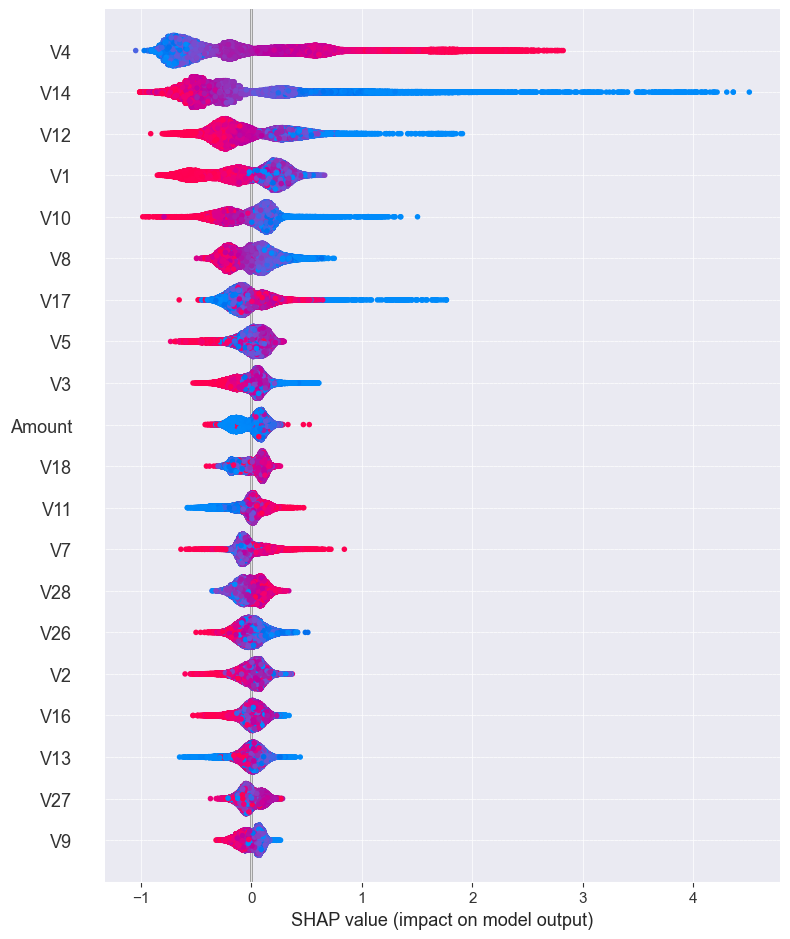

In [175]:
import shap
explainer = shap.TreeExplainer(model_cb)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, plot_size='auto', color_bar=False)
plt.show()

In [ ]:
explainer = shap.Explainer(model_cb)
shap_values = explainer(x_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
#fig = plt.figure(figsize=(12, 6))
#plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
#plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
#plt.title('SHAP Importance')
shap.plots.bar(shap_values, max_display=x_test.shape[0])

In [125]:
predictions_cb = model_cb.predict(x_test)
probabilities_cb = model_cb.predict_proba(x_test)[:,1]

In [139]:
predictions_cb

array([0., 0., 0., ..., 0., 0., 0.])

In [146]:
predictions_series = pd.Series(predictions_cb)
value_counts = predictions_series.value_counts()
value_counts

0.0    56427
1.0    103  
dtype: int64

  -------------------------------------------------
   Roc-Auc Score is: 0.992
  -------------------------------------------------


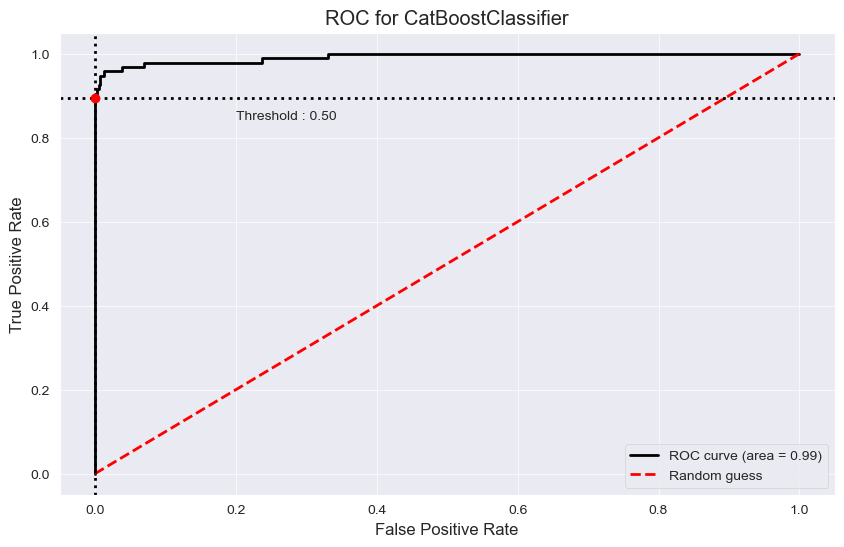

In [195]:
# ROC-AUC diagram
bc = BinaryClassification(y_test, probabilities_cb, labels=["Class 1"])
print('  -------------------------------------------------')
print('   Roc-Auc Score is: {:.3f}'.format(roc_auc_score(y_test, probabilities_cb)))
print('  -------------------------------------------------')
plt.figure(figsize=(10,6))
bc.plot_roc_curve()
plt.title('ROC for CatBoostClassifier')
plt.show()

In [ ]:
# Confusion matrix
confusionMatrix = confusion_matrix(y_test,predictions_cb)
sns.heatmap(confusionMatrix,annot=True, fmt='d', vmin=10, vmax=100,);

In [176]:
# `Сlassification_report`
print('----------------------------------------------------------------------------')
print('Сlassification_report for modelCatBoostClassifier:')
print('-----------------------------------------------------------------------------')
print(classification_report(y_test,predictions_cb))

----------------------------------------------------------------------------
Сlassification_report for modelCatBoostClassifier:
-----------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56435
         1.0       0.83      0.89      0.86        95

    accuracy                           1.00     56530
   macro avg       0.91      0.95      0.93     56530
weighted avg       1.00      1.00      1.00     56530



* Catboost classifier very well predict 0 class (not a fraud), but hardly predict the class 1

* We will review distribuation of the most influencing features - V4 and V14

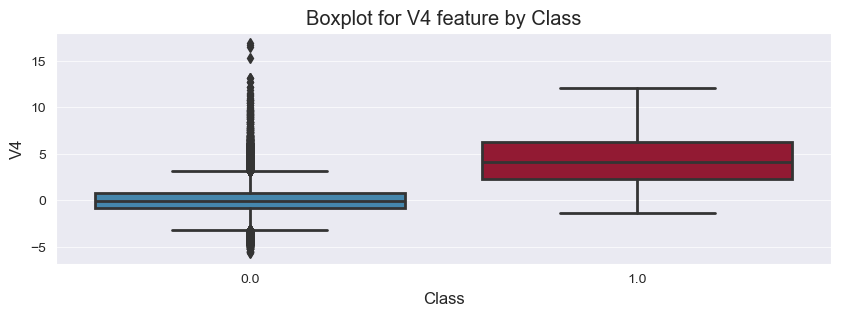

In [193]:
plt.figure(figsize = (10,3))
ax = sns.boxplot(x='Class', y='V4', data=data_sc)
plt.title('Boxplot for V4 feature by Class')
#ax.set_ylim([-10, 10])
plt.show()

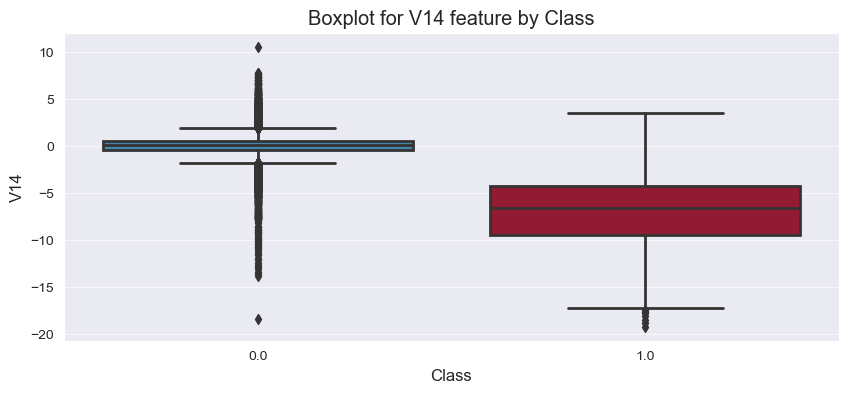

In [191]:
plt.figure(figsize = (10,3))
ax = sns.boxplot(x='Class', y='V14', data=data_sc)
plt.title('Boxplot for V14 feature by Class')
#ax.set_ylim([0, 10])
plt.show()

* As the features V4 and V14 are largly contribute to the model (mostly influence to the result prediction), but at the same time these features have a huge range, the prediction of class 1 is almost not possible 
* Also, the  boxplots below for V4 and V14 confirm how many outliers are in the class 0 as well